# Goals

1. maximize customer retention and profitability.
2.	Encourages higher order frequency from existing customers.
3.	Attract new customers in a cost-effective manner.
3.	Balance the discount benefits with the delivery distance to maintain profitability.





# End Results
-	Students are expected to perform detailed data analysis and understand patterns in orders, customer demographics and discounts offered
-	Any recommendation provided are expected to be backed by data
-	Additional insights and additional forward-looking recommendations are welcome


# Univaraite Analysis

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier

df_orders = pd.read_csv("food_delivery_data.csv")  # Dataset 1
df_demographics = pd.read_csv("food_delivery_data_with_demographics.csv")  # Dataset 2
df_food_type = pd.read_csv("food_delivery_data_with_food_type.csv")  # Dataset 3
df_orders["OrderDate"] = pd.to_datetime(df_orders["OrderDate"])
df_orders["OrderAmount"] = df_orders["OrderAmount"].replace('[\$,]', '', regex=True).astype(float)

# Display the first few rows of both datasets
print(df_orders.head(),end="\n\n")  # For the first dataset
print(df_demographics.head(),"\n\n")  # For the second dataset
print(df_food_type.head())  # For the third dataset


   OrderID  CustomerID  OrderDate  DeliveryDistanceKM  OrderAmount  \
0     8180         436 2024-11-27               17.37        35.53   
1     2138         265 2024-11-27                4.44        36.58   
2     8737         193 2024-10-31               19.66        79.93   
3     1913         769 2024-11-14                1.99        23.16   
4     1506         982 2025-01-05                7.26        24.95   

   DiscountApplied  DeliveryTimeMin  
0             0.70               42  
1             9.36               52  
2             3.38               59  
3             1.44               11  
4            11.87               36  

   OrderID  CustomerID   OrderDate  Age  Gender   City
0     3521         386  12-12-2024   57    Male  CityB
1     7430         259  02-11-2024   68  Female  CityA
2     4477         344  09-01-2025   38  Female  CityC
3     1912         140  25-10-2024   63  Female  CityA
4     4841         406  07-01-2025   68   Other  CityA 


   OrderID  Custo

<ipython-input-1-12886fa57df4>:12: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df_orders["OrderDate"] = pd.to_datetime(df_orders["OrderDate"])


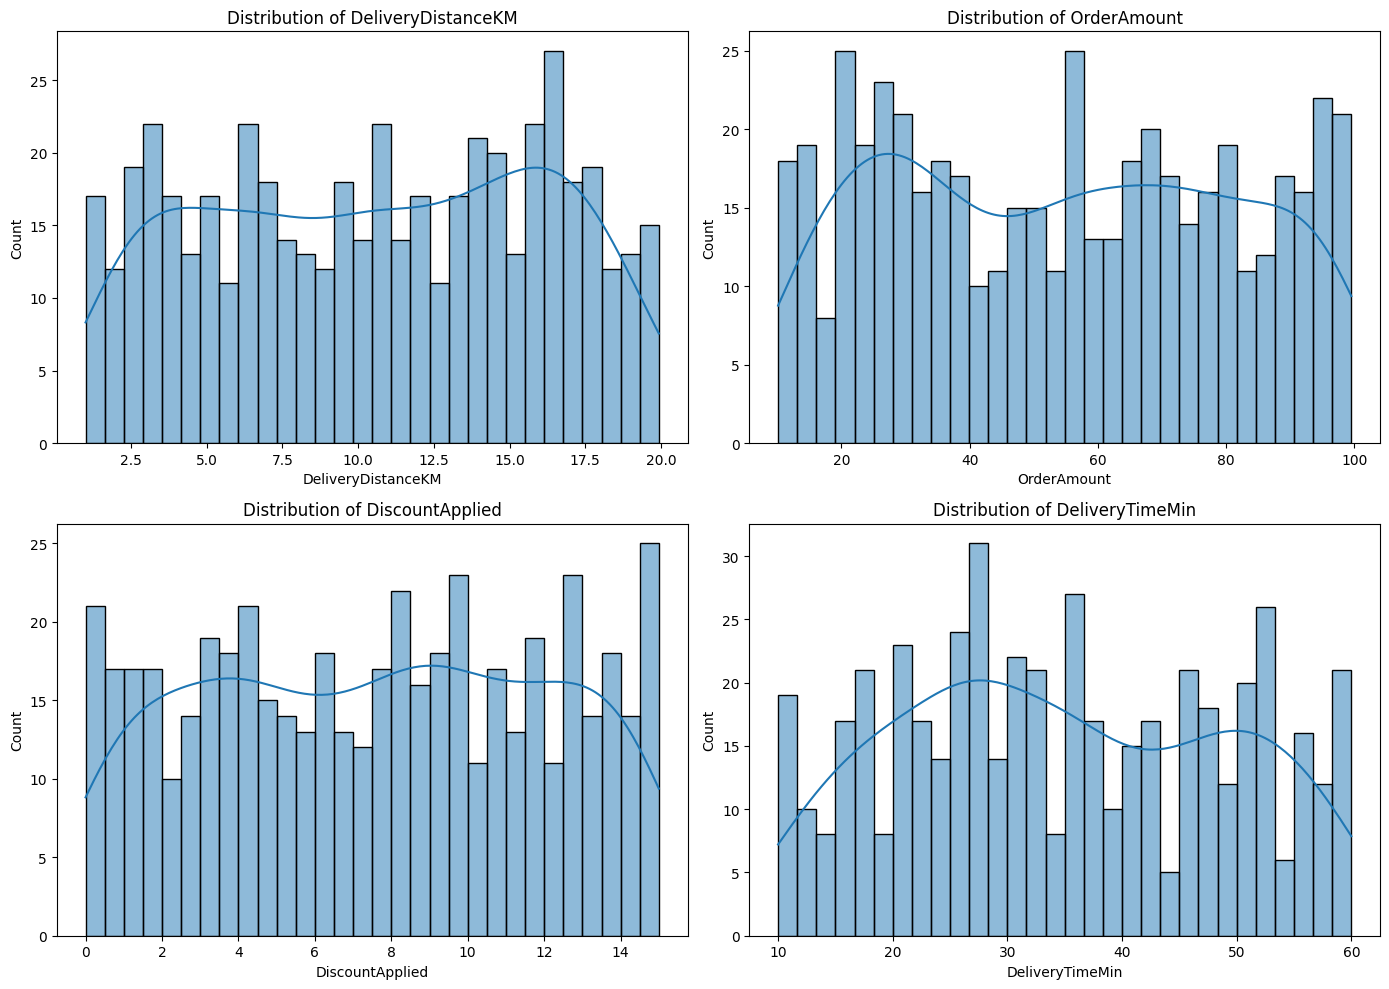

In [ ]:
# Import necessary libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Set the figure size for all histograms
plt.figure(figsize=(14, 10))

# Loop through the numeric columns and plot histograms
numeric_columns = ['DeliveryDistanceKM', 'OrderAmount', 'DiscountApplied', 'DeliveryTimeMin']

for i, column in enumerate(numeric_columns, 1):
    plt.subplot(2, 2, i)  # Create a 2x2 grid of subplots
    sns.histplot(df_orders[column].str.replace('$', '').astype(float) if column == 'OrderAmount' else df_orders[column], kde=True, bins=30)
    plt.title(f'Distribution of {column}')
    plt.tight_layout()

# Show the histograms
plt.show()


           OrderID  CustomerID  DeliveryDistanceKM  DiscountApplied  \
count   500.000000  500.000000           500.00000       500.000000   
mean   5465.224000  557.098000            10.56950         7.587060   
std    2627.775576  259.839746             5.47019         4.428682   
min    1019.000000  100.000000             1.00000         0.000000   
25%    3122.250000  336.750000             5.93250         3.757500   
50%    5499.000000  543.500000            10.71500         7.840000   
75%    7663.500000  770.500000            15.58000        11.472500   
max    9999.000000  999.000000            19.93000        15.000000   

       DeliveryTimeMin  
count       500.000000  
mean         34.754000  
std          14.087811  
min          10.000000  
25%          24.000000  
50%          34.000000  
75%          47.000000  
max          60.000000  


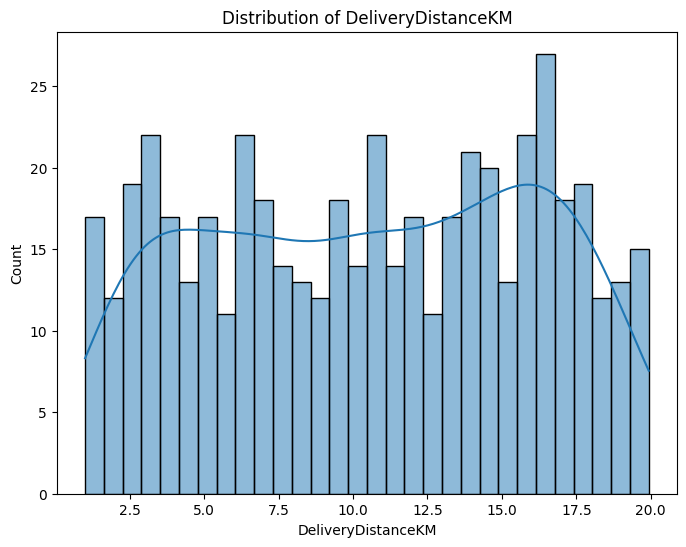

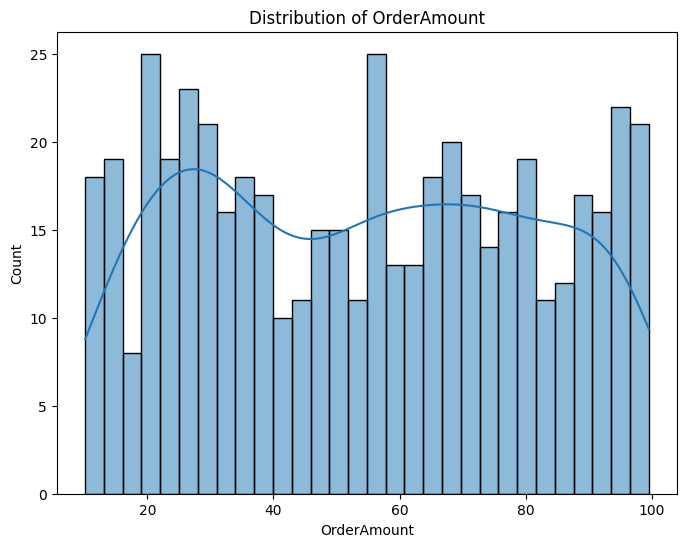

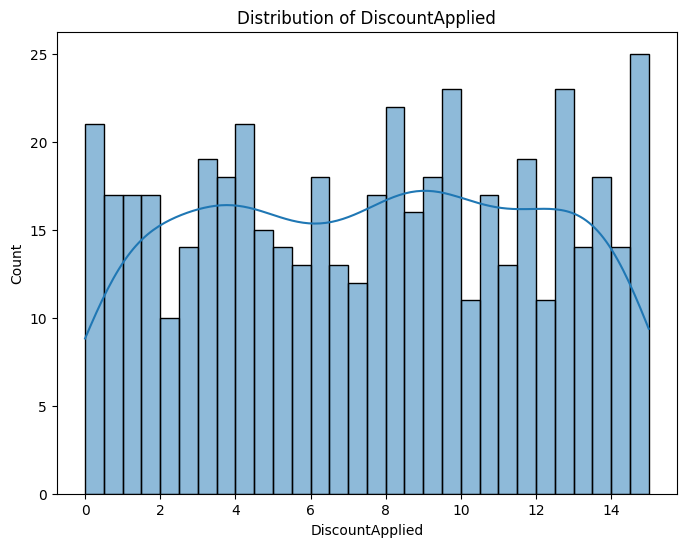

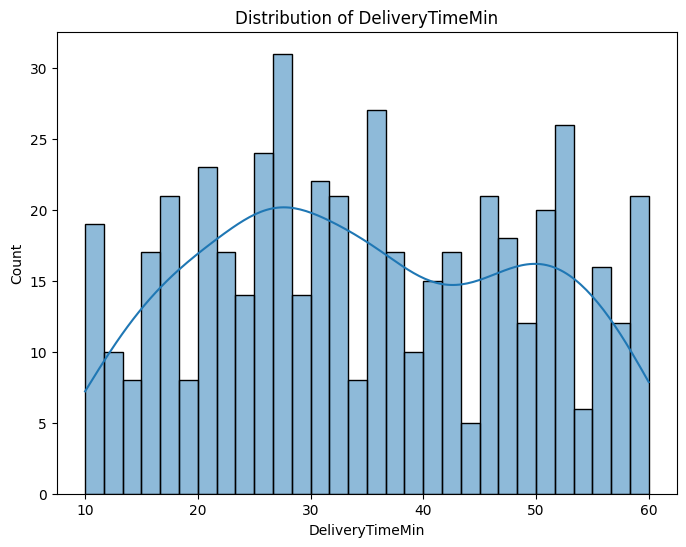

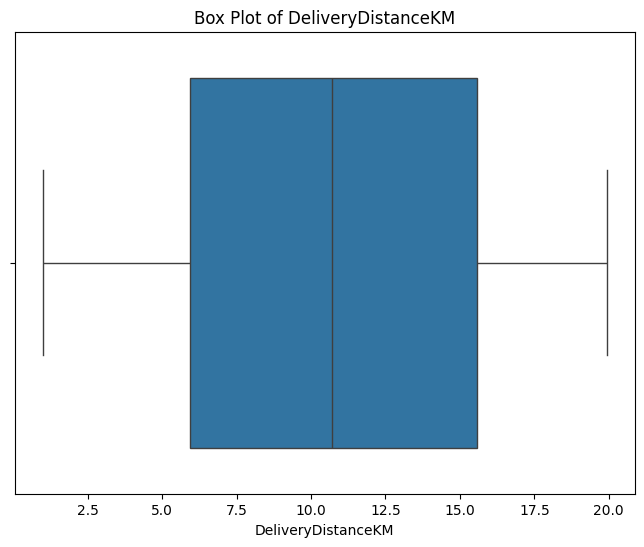

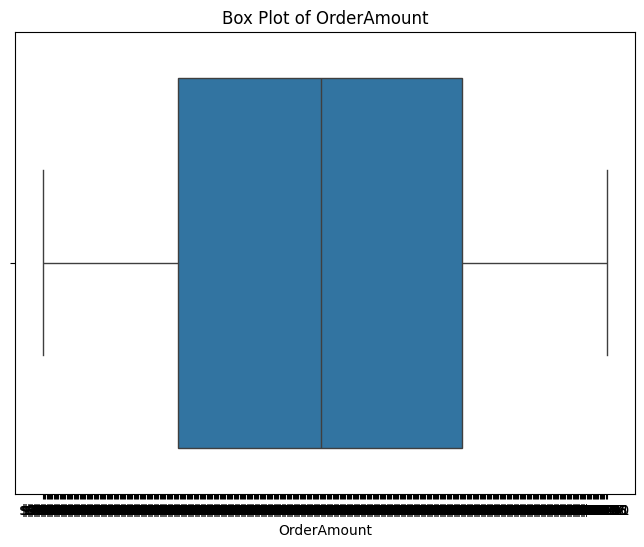

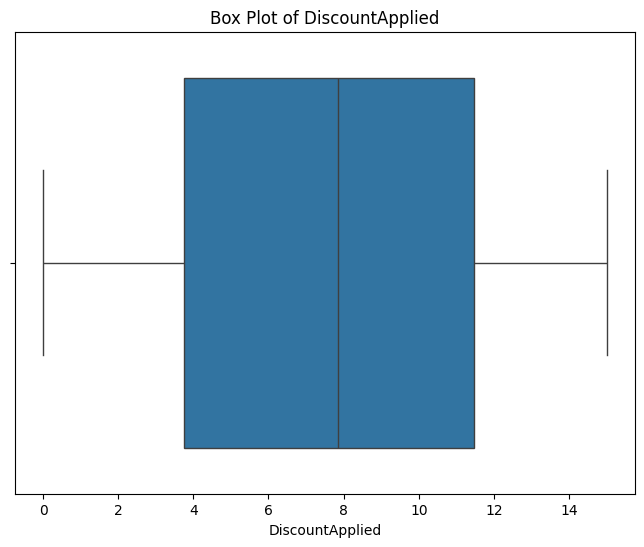

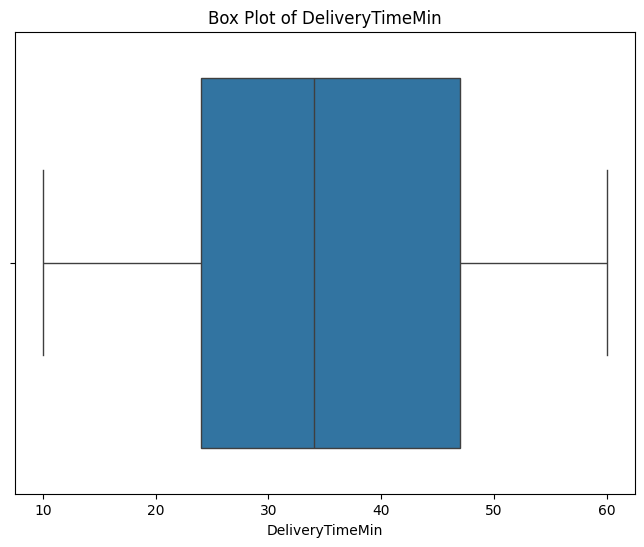

DeliveryDistanceKM - Skewness: -0.0683467177676414
DeliveryDistanceKM - Kurtosis: -1.2383649729215174

OrderAmount - Skewness: 0.04242795537256942
OrderAmount - Kurtosis: -1.2569639351068556

DiscountApplied - Skewness: -0.025069902188810715
DiscountApplied - Kurtosis: -1.20999693064262

DeliveryTimeMin - Skewness: 0.08718986259915809
DeliveryTimeMin - Kurtosis: -1.1054171094126177



In [ ]:
# Import necessary libraries
import seaborn as sns
import matplotlib.pyplot as plt

# Descriptive statistics
print(df_orders.describe())

# Histograms for all numeric columns
numeric_columns = ['DeliveryDistanceKM', 'OrderAmount', 'DiscountApplied', 'DeliveryTimeMin']
for column in numeric_columns:
    plt.figure(figsize=(8, 6))
    sns.histplot(df_orders[column].str.replace('$', '').astype(float) if column == 'OrderAmount' else df_orders[column], kde=True, bins=30)
    plt.title(f'Distribution of {column}')
    plt.show()

# Box plots to check for outliers
for column in numeric_columns:
    plt.figure(figsize=(8, 6))
    sns.boxplot(data=df_orders, x=column)
    plt.title(f'Box Plot of {column}')
    plt.show()

# Skewness and Kurtosis
from scipy.stats import skew, kurtosis

for column in numeric_columns:
    data = df_orders[column].str.replace('$', '').astype(float) if column == 'OrderAmount' else df_orders[column]
    print(f"{column} - Skewness: {skew(data)}")
    print(f"{column} - Kurtosis: {kurtosis(data)}\n")


- Data is fairly symmetric, with only very slight deviations from symmetry.

- The distributions have fewer outliers than would be expected in a normal distribution (since kurtosis is negative).

- The box plots reinforce the idea that there is not much skew, and the data is largely within the interquartile range without extreme values.

# Bivariate Analysis

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns

df_orders = pd.read_csv("food_delivery_data.csv")  # Dataset 1
df_demographics = pd.read_csv("food_delivery_data_with_demographics.csv")  # Dataset 2
df_food_type = pd.read_csv("food_delivery_data_with_food_type.csv")  # Dataset 3
df_orders["OrderDate"] = pd.to_datetime(df_orders["OrderDate"])
df_orders["OrderAmount"] = df_orders["OrderAmount"].replace('[\$,]', '', regex=True).astype(float)

<ipython-input-13-d46f1656f8e7>:12: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df_orders["OrderDate"] = pd.to_datetime(df_orders["OrderDate"])


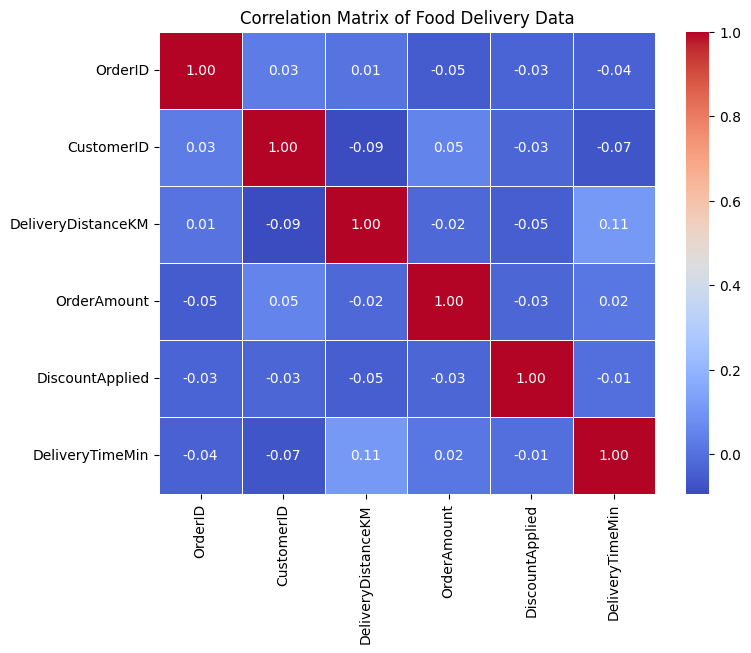

In [ ]:
# Drop categorical columns
df_corr = df_orders.drop(columns=["OrderDate"])

# Compute correlation matrix
corr_matrix = df_corr.corr()

# Plot heatmap
plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix of Food Delivery Data")
plt.show()


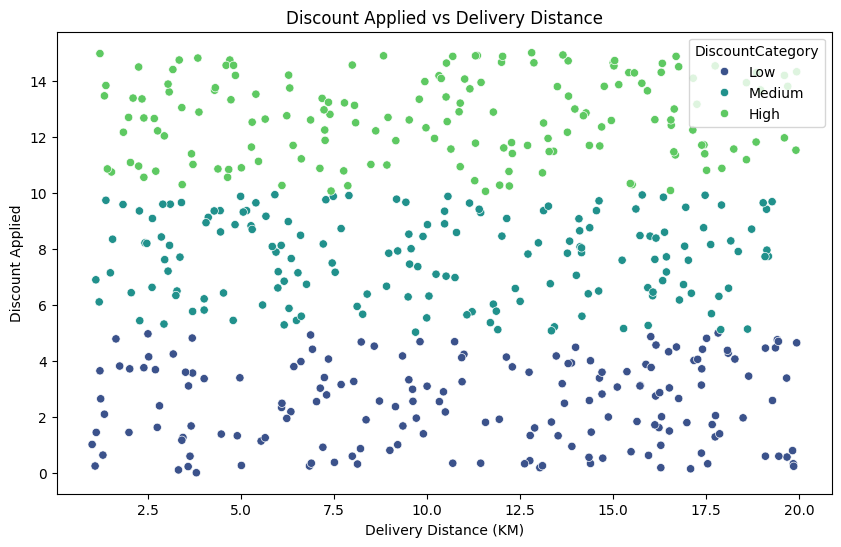

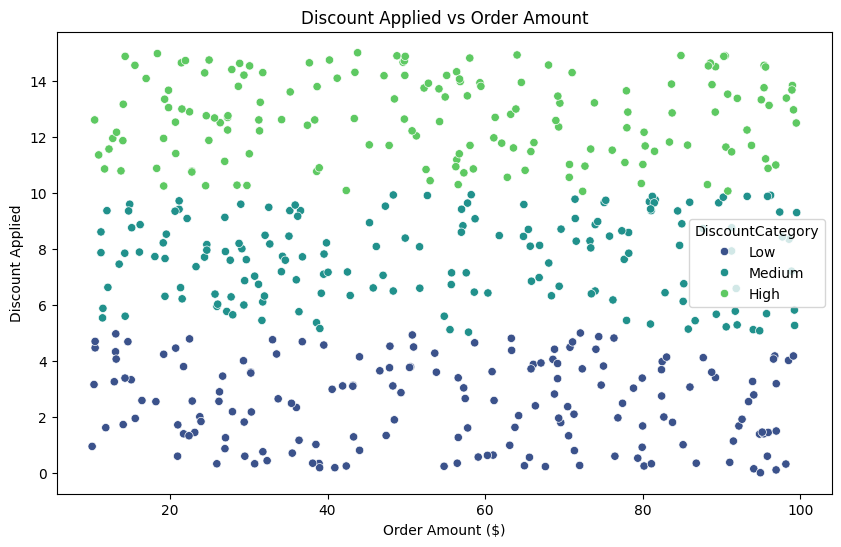

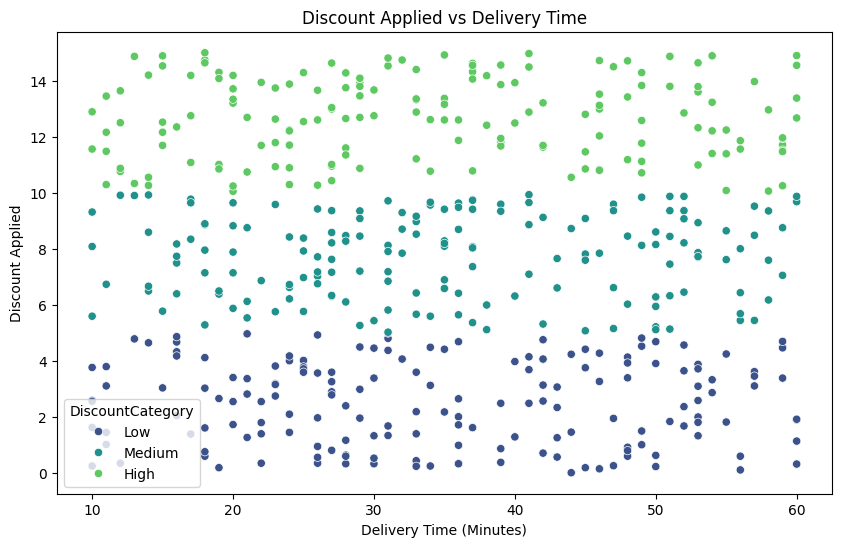

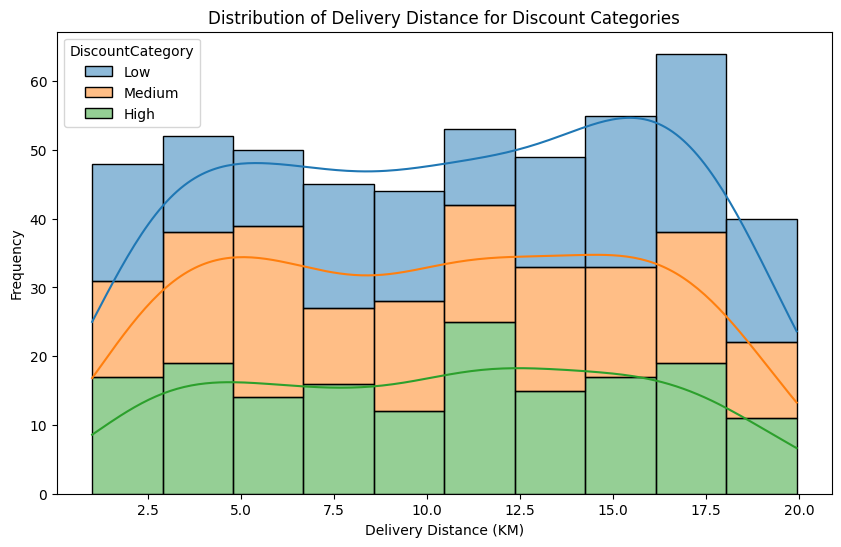

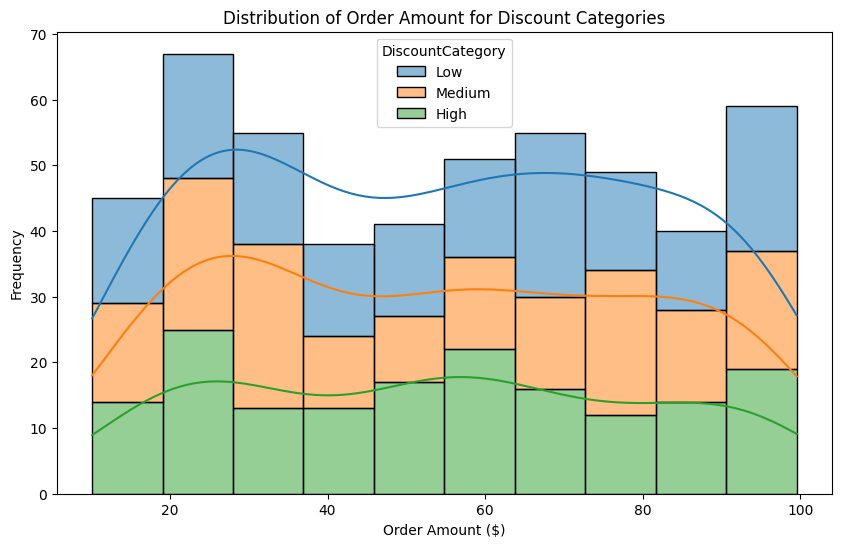

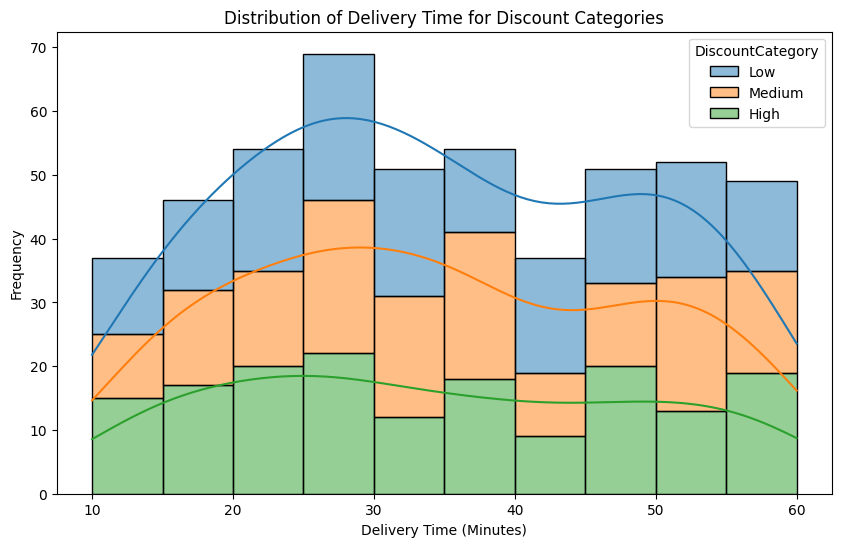

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Segment DiscountApplied into bins (you can adjust the ranges based on the distribution)
bins = [0, 5, 10, 20]  # Example bins for Low, Medium, High discount
labels = ['Low', 'Medium', 'High']
df_orders['DiscountCategory'] = pd.cut(df_orders['DiscountApplied'], bins=bins, labels=labels, include_lowest=True)

# Scatter Plot for DiscountApplied vs DeliveryDistanceKM
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_orders, x='DeliveryDistanceKM', y='DiscountApplied', hue='DiscountCategory', palette='viridis')
plt.title('Discount Applied vs Delivery Distance')
plt.xlabel('Delivery Distance (KM)')
plt.ylabel('Discount Applied')
plt.show()

# Scatter Plot for DiscountApplied vs OrderAmount
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_orders, x='OrderAmount', y='DiscountApplied', hue='DiscountCategory', palette='viridis')
plt.title('Discount Applied vs Order Amount')
plt.xlabel('Order Amount ($)')
plt.ylabel('Discount Applied')
plt.show()

# Scatter Plot for DiscountApplied vs DeliveryTimeMin
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_orders, x='DeliveryTimeMin', y='DiscountApplied', hue='DiscountCategory', palette='viridis')
plt.title('Discount Applied vs Delivery Time')
plt.xlabel('Delivery Time (Minutes)')
plt.ylabel('Discount Applied')
plt.show()

# Histogram for Discount Applied vs Delivery Distance
plt.figure(figsize=(10, 6))
sns.histplot(data=df_orders, x='DeliveryDistanceKM', hue='DiscountCategory', multiple="stack", kde=True)
plt.title('Distribution of Delivery Distance for Discount Categories')
plt.xlabel('Delivery Distance (KM)')
plt.ylabel('Frequency')
plt.show()

# Histogram for Discount Applied vs Order Amount
plt.figure(figsize=(10, 6))
sns.histplot(data=df_orders, x='OrderAmount', hue='DiscountCategory', multiple="stack", kde=True)
plt.title('Distribution of Order Amount for Discount Categories')
plt.xlabel('Order Amount ($)')
plt.ylabel('Frequency')
plt.show()

# Histogram for Discount Applied vs Delivery Time
plt.figure(figsize=(10, 6))
sns.histplot(data=df_orders, x='DeliveryTimeMin', hue='DiscountCategory', multiple="stack", kde=True)
plt.title('Distribution of Delivery Time for Discount Categories')
plt.xlabel('Delivery Time (Minutes)')
plt.ylabel('Frequency')
plt.show()


<ipython-input-18-25a77210aad4>:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_orders, x='DeliveryDistanceCategory', y='DiscountApplied', palette='viridis')


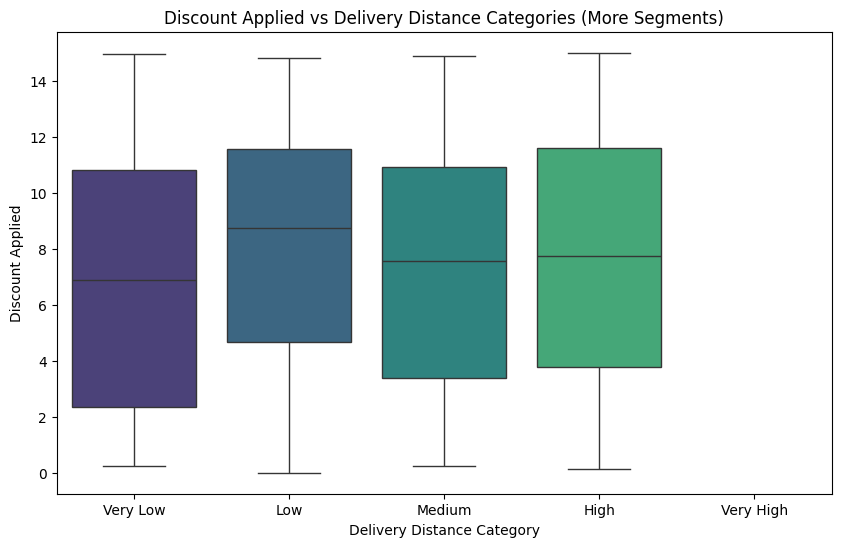

<ipython-input-18-25a77210aad4>:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_orders, x='OrderAmountCategory', y='DiscountApplied', palette='viridis')


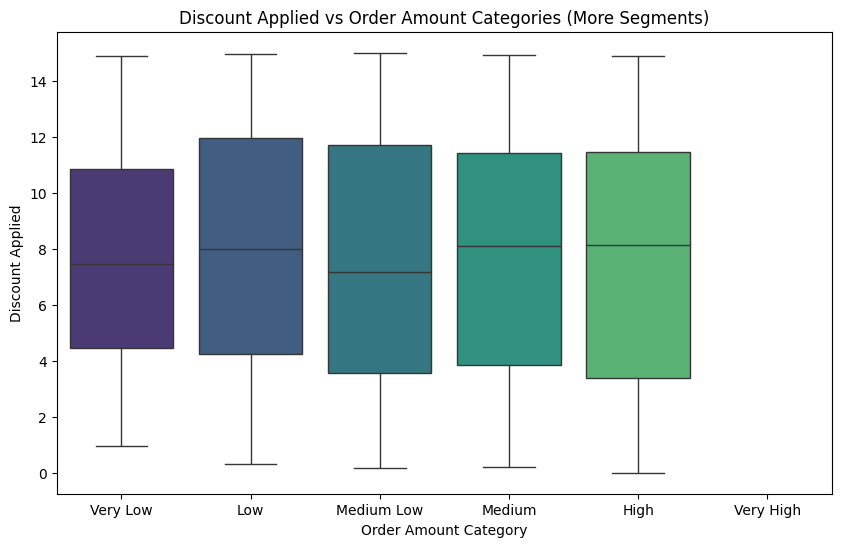

<ipython-input-18-25a77210aad4>:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_orders, x='DeliveryTimeCategory', y='DiscountApplied', palette='viridis')


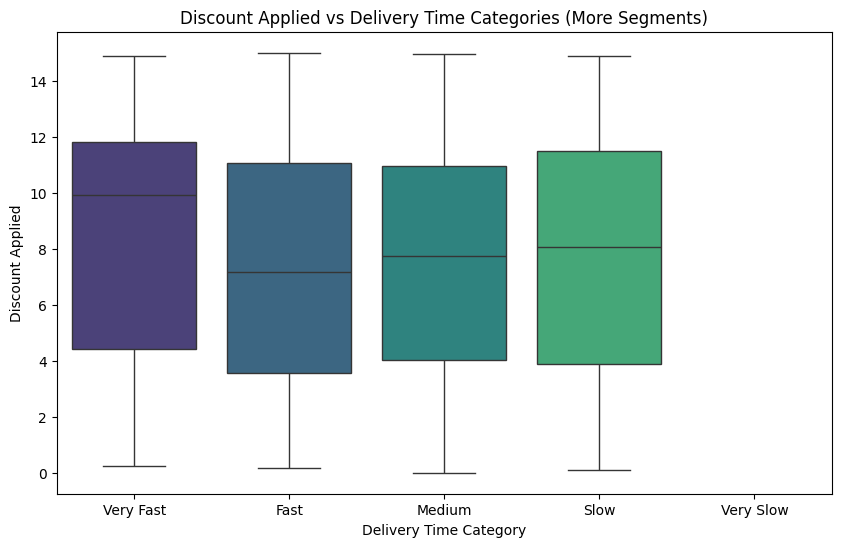

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Segmenting DeliveryDistanceKM into finer bins
bins_distance = [0, 2, 5, 10, 20, 50]  # Example bins: Very Low, Low, Medium, High, Very High delivery distances
labels_distance = ['Very Low', 'Low', 'Medium', 'High', 'Very High']
df_orders['DeliveryDistanceCategory'] = pd.cut(df_orders['DeliveryDistanceKM'], bins=bins_distance, labels=labels_distance, include_lowest=True)

# Segmenting OrderAmount into more detailed bins
bins_order = [0, 15, 30, 50, 75, 100, 200]  # Example bins: Very Low, Low, Medium Low, Medium, High, Very High order amounts
labels_order = ['Very Low', 'Low', 'Medium Low', 'Medium', 'High', 'Very High']
df_orders['OrderAmountCategory'] = pd.cut(df_orders['OrderAmount'].replace({'\$': ''}, regex=True).astype(float), bins=bins_order, labels=labels_order, include_lowest=True)

# Segmenting DeliveryTimeMin into finer bins
bins_time = [0, 15, 30, 45, 60, 120]  # Example bins: Very Fast, Fast, Medium, Slow, Very Slow delivery times
labels_time = ['Very Fast', 'Fast', 'Medium', 'Slow', 'Very Slow']
df_orders['DeliveryTimeCategory'] = pd.cut(df_orders['DeliveryTimeMin'], bins=bins_time, labels=labels_time, include_lowest=True)

# Plotting DiscountApplied vs Segmented DeliveryDistanceKM (with more segments)
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_orders, x='DeliveryDistanceCategory', y='DiscountApplied', palette='viridis')
plt.title('Discount Applied vs Delivery Distance Categories (More Segments)')
plt.xlabel('Delivery Distance Category')
plt.ylabel('Discount Applied')
plt.show()

# Plotting DiscountApplied vs Segmented OrderAmount (with more segments)
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_orders, x='OrderAmountCategory', y='DiscountApplied', palette='viridis')
plt.title('Discount Applied vs Order Amount Categories (More Segments)')
plt.xlabel('Order Amount Category')
plt.ylabel('Discount Applied')
plt.show()

# Plotting DiscountApplied vs Segmented DeliveryTimeMin (with more segments)
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_orders, x='DeliveryTimeCategory', y='DiscountApplied', palette='viridis')
plt.title('Discount Applied vs Delivery Time Categories (More Segments)')
plt.xlabel('Delivery Time Category')
plt.ylabel('Discount Applied')
plt.show()


<ipython-input-20-48df74b18c29>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_orders, x='DeliveryDistanceCategory', y='DiscountApplied', palette='viridis', estimator='mean')


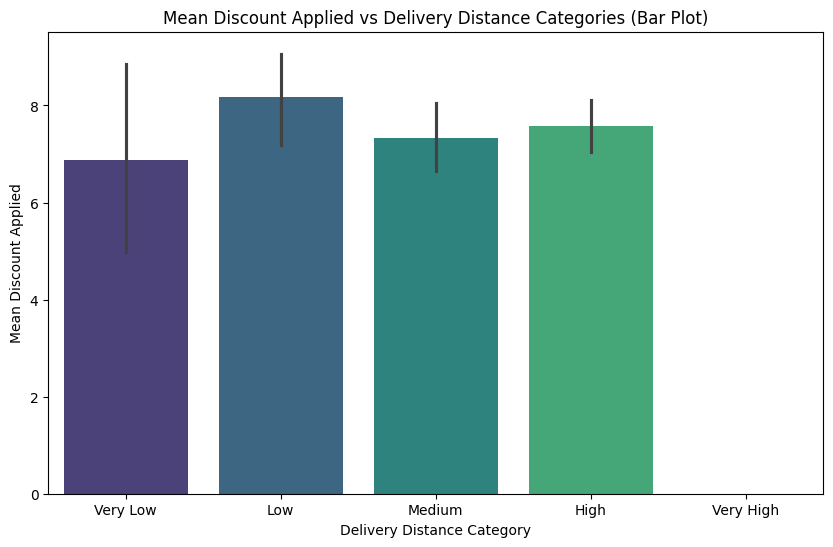

<ipython-input-20-48df74b18c29>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_orders, x='OrderAmountCategory', y='DiscountApplied', palette='viridis', estimator='mean')


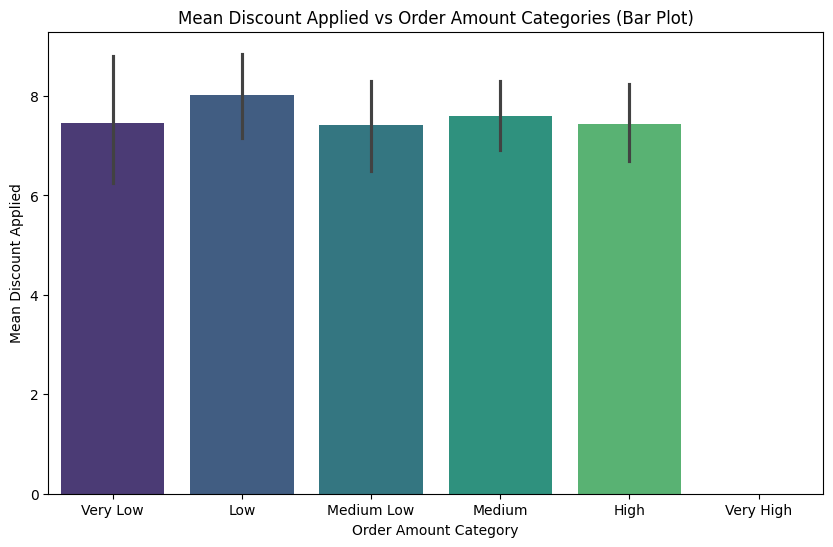

<ipython-input-20-48df74b18c29>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_orders, x='DeliveryTimeCategory', y='DiscountApplied', palette='viridis', estimator='mean')


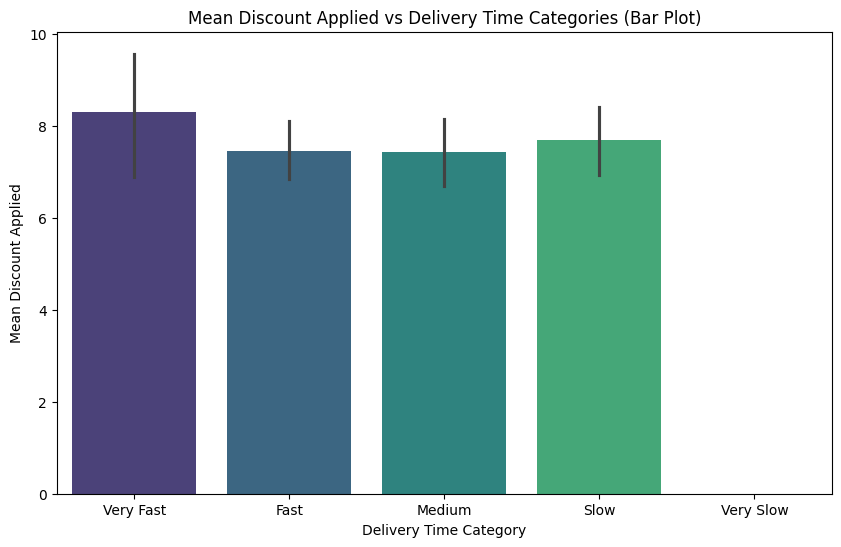

In [ ]:
# Bar Plot for DiscountApplied vs Segmented DeliveryDistanceKM (with mean)
plt.figure(figsize=(10, 6))
sns.barplot(data=df_orders, x='DeliveryDistanceCategory', y='DiscountApplied', palette='viridis', estimator='mean')
plt.title('Mean Discount Applied vs Delivery Distance Categories (Bar Plot)')
plt.xlabel('Delivery Distance Category')
plt.ylabel('Mean Discount Applied')
plt.show()

# Bar Plot for DiscountApplied vs Segmented OrderAmount (with mean)
plt.figure(figsize=(10, 6))
sns.barplot(data=df_orders, x='OrderAmountCategory', y='DiscountApplied', palette='viridis', estimator='mean')
plt.title('Mean Discount Applied vs Order Amount Categories (Bar Plot)')
plt.xlabel('Order Amount Category')
plt.ylabel('Mean Discount Applied')
plt.show()

# Bar Plot for DiscountApplied vs Segmented DeliveryTimeMin (with mean)
plt.figure(figsize=(10, 6))
sns.barplot(data=df_orders, x='DeliveryTimeCategory', y='DiscountApplied', palette='viridis', estimator='mean')
plt.title('Mean Discount Applied vs Delivery Time Categories (Bar Plot)')
plt.xlabel('Delivery Time Category')
plt.ylabel('Mean Discount Applied')
plt.show()


<ipython-input-21-a2e20c2e312e>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.stripplot(data=df_orders, x='DeliveryDistanceCategory', y='DiscountApplied', jitter=True, palette='viridis')


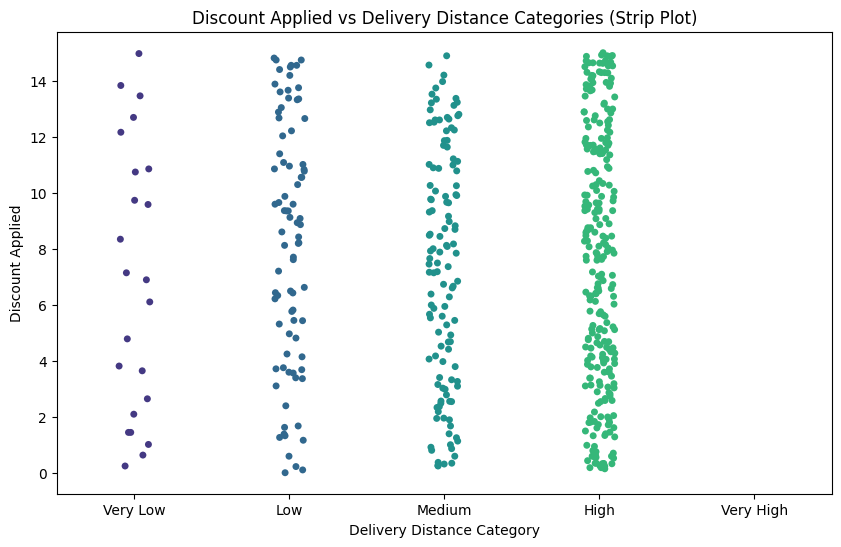

<ipython-input-21-a2e20c2e312e>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.stripplot(data=df_orders, x='OrderAmountCategory', y='DiscountApplied', jitter=True, palette='viridis')


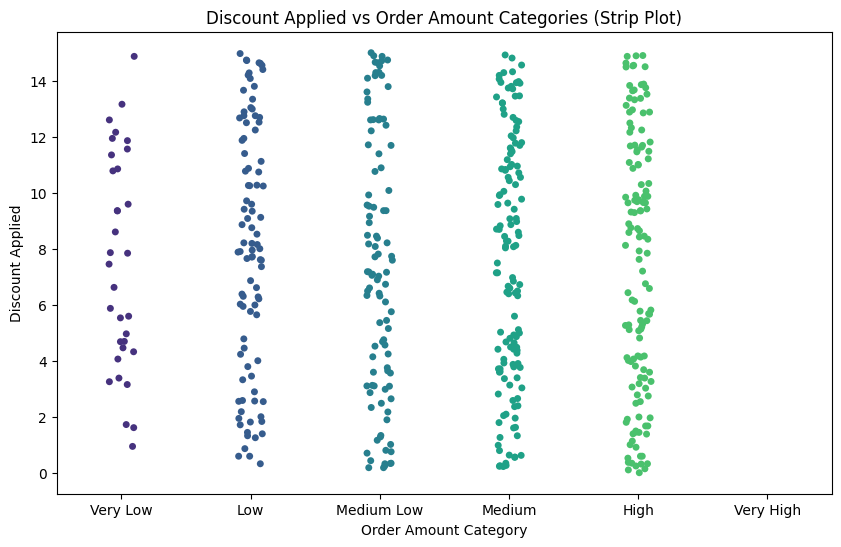

<ipython-input-21-a2e20c2e312e>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.stripplot(data=df_orders, x='DeliveryTimeCategory', y='DiscountApplied', jitter=True, palette='viridis')


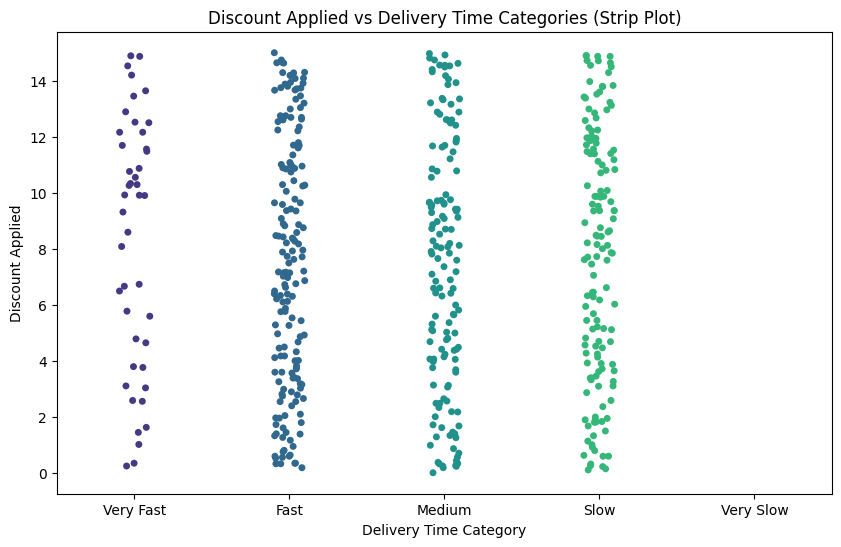

In [ ]:
  # Strip Plot for DiscountApplied vs Segmented DeliveryDistanceKM
plt.figure(figsize=(10, 6))
sns.stripplot(data=df_orders, x='DeliveryDistanceCategory', y='DiscountApplied', jitter=True, palette='viridis')
plt.title('Discount Applied vs Delivery Distance Categories (Strip Plot)')
plt.xlabel('Delivery Distance Category')
plt.ylabel('Discount Applied')
plt.show()

# Strip Plot for DiscountApplied vs Segmented OrderAmount
plt.figure(figsize=(10, 6))
sns.stripplot(data=df_orders, x='OrderAmountCategory', y='DiscountApplied', jitter=True, palette='viridis')
plt.title('Discount Applied vs Order Amount Categories (Strip Plot)')
plt.xlabel('Order Amount Category')
plt.ylabel('Discount Applied')
plt.show()

# Strip Plot for DiscountApplied vs Segmented DeliveryTimeMin
plt.figure(figsize=(10, 6))
sns.stripplot(data=df_orders, x='DeliveryTimeCategory', y='DiscountApplied', jitter=True, palette='viridis')
plt.title('Discount Applied vs Delivery Time Categories (Strip Plot)')
plt.xlabel('Delivery Time Category')
plt.ylabel('Discount Applied')
plt.show()


<ipython-input-47-7b9770a8f096>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=order_amount_counts.index, y=order_amount_counts.values, palette='viridis')


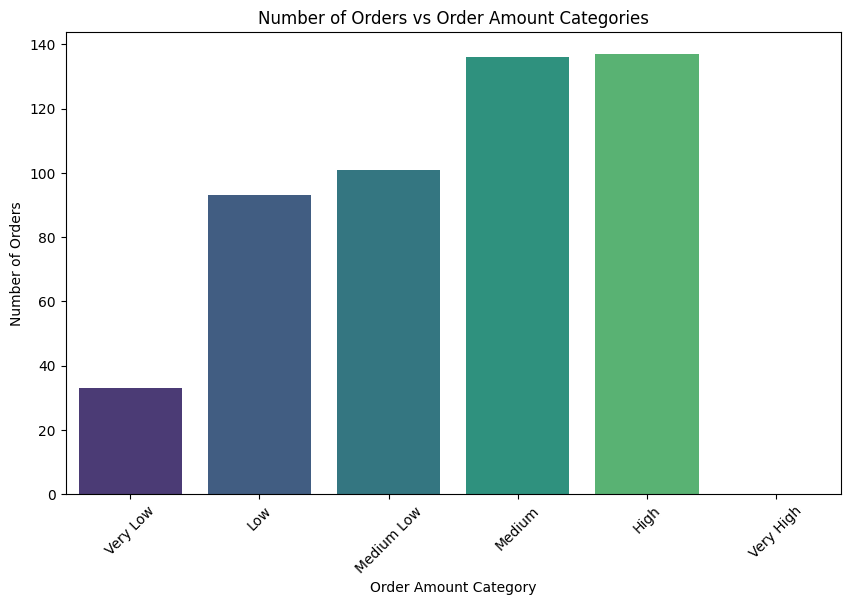

<ipython-input-47-7b9770a8f096>:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=delivery_distance_counts.index, y=delivery_distance_counts.values, palette='viridis')


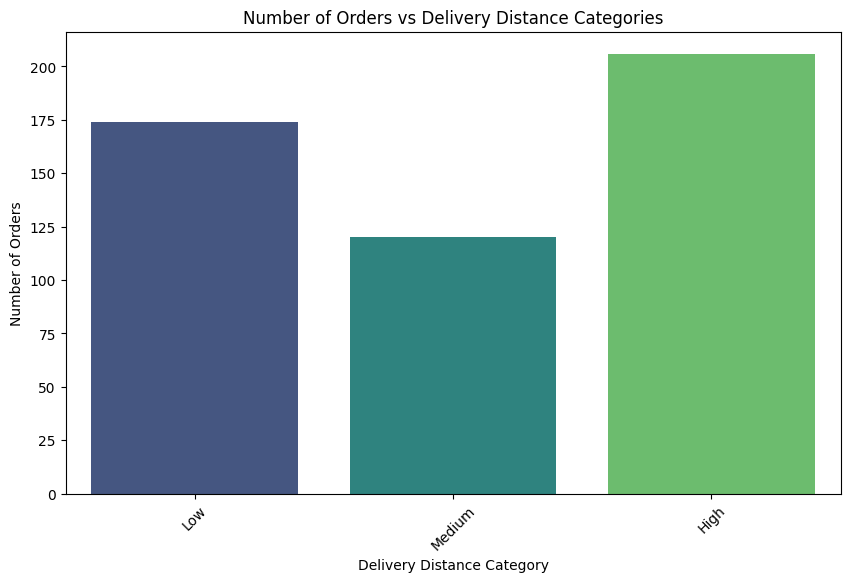

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the number of orders in each OrderAmountCategory
order_amount_counts = df_orders['OrderAmountCategory'].value_counts().sort_index()

# Calculate the number of orders in each DeliveryDistanceCategory
delivery_distance_counts = df_orders['DeliveryDistanceCategory'].value_counts().sort_index()

# Plot for Order Amount Categories
plt.figure(figsize=(10, 6))
sns.barplot(x=order_amount_counts.index, y=order_amount_counts.values, palette='viridis')
plt.title('Number of Orders vs Order Amount Categories')
plt.xlabel('Order Amount Category')
plt.ylabel('Number of Orders')
plt.xticks(rotation=45)
plt.show()

# Plot for Delivery Distance Categories
plt.figure(figsize=(10, 6))
sns.barplot(x=delivery_distance_counts.index, y=delivery_distance_counts.values, palette='viridis')
plt.title('Number of Orders vs Delivery Distance Categories')
plt.xlabel('Delivery Distance Category')
plt.ylabel('Number of Orders')
plt.xticks(rotation=45)
plt.show()


In [ ]:
# Step 1: Calculate Mean, Median, and Mode for Delivery Distance and Order Amount

# Delivery Distance Statistics
mean_distance = df_orders['DeliveryDistanceKM'].mean()
median_distance = df_orders['DeliveryDistanceKM'].median()
mode_distance = df_orders['DeliveryDistanceKM'].mode()[0]

# Order Amount Statistics
# Remove the '$' sign from OrderAmount before performing calculations
df_orders['OrderAmount_numeric'] = df_orders['OrderAmount'].replace({'\$': ''}, regex=True).astype(float)

mean_order = df_orders['OrderAmount_numeric'].mean()
median_order = df_orders['OrderAmount_numeric'].median()
mode_order = df_orders['OrderAmount_numeric'].mode()[0]

# Step 2: Calculate Percentage Distribution of Orders across Categories
# For Delivery Distance Categories
distance_category_percentage = (df_orders['DeliveryDistanceCategory'].value_counts(normalize=True) * 100).sort_index()

# For Order Amount Categories
order_category_percentage = (df_orders['OrderAmountCategory'].value_counts(normalize=True) * 100).sort_index()

# Display the results
print("Delivery Distance Statistics:")
print(f"Mean: {mean_distance} km")
print(f"Median: {median_distance} km")
print(f"Mode: {mode_distance} km\n")

print("Order Amount Statistics:")
print(f"Mean: ${mean_order}")
print(f"Median: ${median_order}")
print(f"Mode: ${mode_order}\n")

print("Percentage Distribution of Orders by Delivery Distance Category:")
print(distance_category_percentage)
print("\nPercentage Distribution of Orders by Order Amount Category:")
print(order_category_percentage)


Delivery Distance Statistics:
Mean: 10.5695 km
Median: 10.715 km
Mode: 2.39 km

Order Amount Statistics:
Mean: $54.46808
Median: $55.72
Mode: $10.52

Percentage Distribution of Orders by Delivery Distance Category:
DeliveryDistanceCategory
Very Low      4.6
Low          16.8
Medium       24.8
High         53.8
Very High     0.0
Name: proportion, dtype: float64

Percentage Distribution of Orders by Order Amount Category:
OrderAmountCategory
Very Low       6.6
Low           18.6
Medium Low    20.2
Medium        27.2
High          27.4
Very High      0.0
Name: proportion, dtype: float64


In [ ]:
# Calculate the Pearson correlation between Delivery Distance and Order Amount
correlation = df_orders['DeliveryDistanceKM'].corr(df_orders['OrderAmount_numeric'])

# Create Delivery Distance Categories
distance_bins = [0, 2, 5, 10, 20]  # Adjust these bins as per the data distribution
distance_labels = ['Very Low', 'Low', 'Medium', 'High']
df_orders['DeliveryDistanceCategory'] = pd.cut(df_orders['DeliveryDistanceKM'], bins=distance_bins, labels=distance_labels, include_lowest=True)

# Calculate the average Order Amount for each Delivery Distance Category
average_order_by_distance = df_orders.groupby('DeliveryDistanceCategory')['OrderAmount_numeric'].mean()

# Print the results
print(f"Pearson Correlation between Delivery Distance and Order Amount: {correlation}")
print("\nAverage Order Amount by Delivery Distance Category:")
print(average_order_by_distance)


Pearson Correlation between Delivery Distance and Order Amount: -0.024268899535464985

Average Order Amount by Delivery Distance Category:
DeliveryDistanceCategory
Very Low    53.445652
Low         57.584286
Medium      53.793145
High        53.893532
Name: OrderAmount_numeric, dtype: float64


<ipython-input-31-43b5ed7d710b>:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  average_order_by_distance = df_orders.groupby('DeliveryDistanceCategory')['OrderAmount_numeric'].mean()


<ipython-input-6-3b2ae3c88cee>:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mean_delivery_time_by_distance = df_orders.groupby('DeliveryDistanceCategory')['DeliveryTimeMin'].mean()


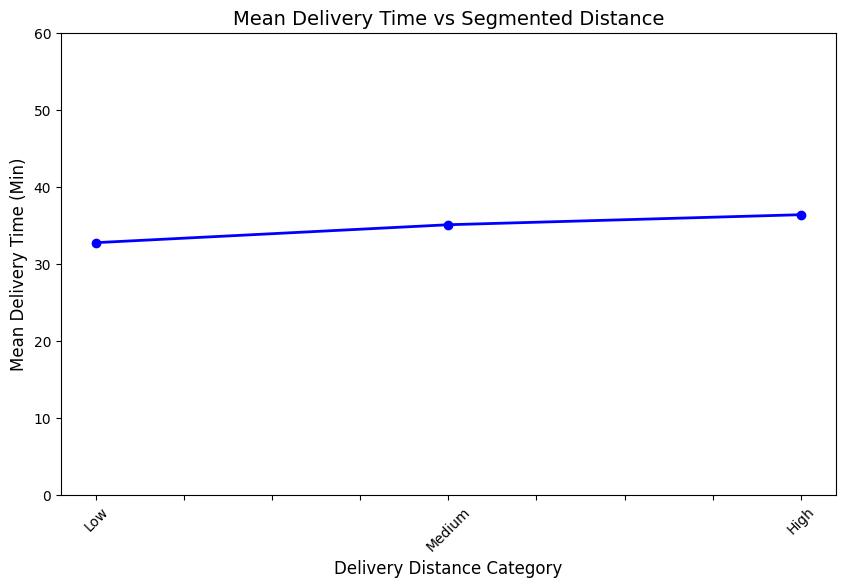

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Create distance categories
distance_bins = [0, 7, 14, 20]  # Adjust based on data distribution
distance_labels = ['Low', 'Medium', 'High']
df_orders['DeliveryDistanceCategory'] = pd.cut(df_orders['DeliveryDistanceKM'], bins=distance_bins, labels=distance_labels, include_lowest=True)

# Calculate mean delivery time
mean_delivery_time_by_distance = df_orders.groupby('DeliveryDistanceCategory')['DeliveryTimeMin'].mean()

# Plot the graph
plt.figure(figsize=(10, 6))
mean_delivery_time_by_distance.plot(kind='line', marker='o', color='blue', linestyle='-', linewidth=2, markersize=6)

# Adjust y-axis scale for fairer representation
plt.ylim(0, 60)  # Set lower limit to 20 for better scaling

# Adding titles and labels
plt.title('Mean Delivery Time vs Segmented Distance', fontsize=14)
plt.xlabel('Delivery Distance Category', fontsize=12)
plt.ylabel('Mean Delivery Time (Min)', fontsize=12)
plt.xticks(rotation=45)

# Show plot
plt.show()


In [ ]:
# Create Delivery Distance Categories (again, for segmentation)
distance_bins = [0, 2, 5, 10, 20]  # Adjusted distance bins
distance_labels = ['Very Low', 'Low', 'Medium', 'High']
df_orders['DeliveryDistanceCategory'] = pd.cut(df_orders['DeliveryDistanceKM'], bins=distance_bins, labels=distance_labels, include_lowest=True)

# Calculate the average Discount for each Delivery Distance Category
average_discount_by_distance = df_orders.groupby('DeliveryDistanceCategory')['DiscountApplied'].mean()

# Print the results
print("Average Discount Given by Delivery Distance Category:")
print(average_discount_by_distance)


Average Discount Given by Delivery Distance Category:
DeliveryDistanceCategory
Very Low    6.878261
Low         8.169167
Medium      7.328952
High        7.584870
Name: DiscountApplied, dtype: float64


<ipython-input-33-386a394e7266>:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  average_discount_by_distance = df_orders.groupby('DeliveryDistanceCategory')['DiscountApplied'].mean()


<ipython-input-45-8e559ee31d39>:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mean_discount_by_distance = df_orders.groupby('DeliveryDistanceCategory')['DiscountApplied'].mean()


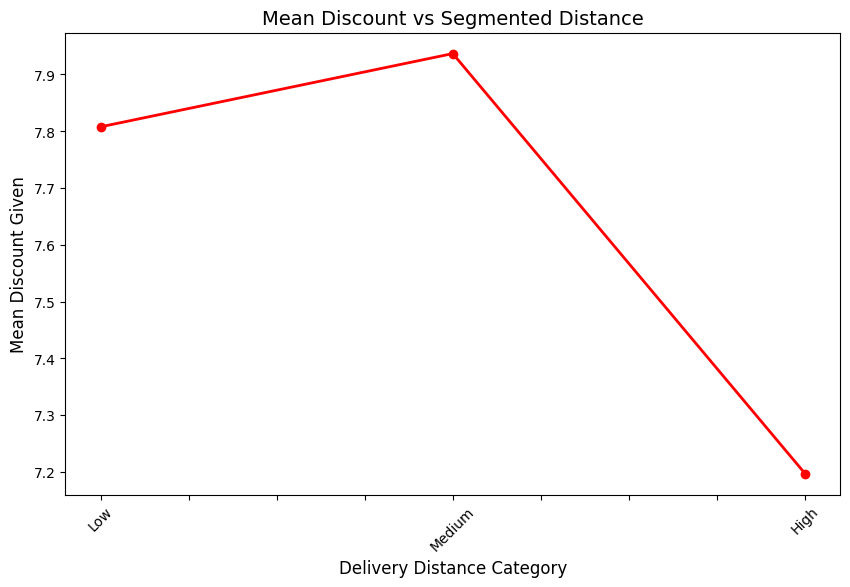

In [ ]:
# Calculate the mean discount for each distance category
distance_bins = [0,7.5,12.5,20]  # Adjusted distance bins
distance_labels = ['Low', 'Medium', 'High']
df_orders['DeliveryDistanceCategory'] = pd.cut(df_orders['DeliveryDistanceKM'], bins=distance_bins, labels=distance_labels, include_lowest=True)
mean_discount_by_distance = df_orders.groupby('DeliveryDistanceCategory')['DiscountApplied'].mean()

# Plot the mean discount vs segmented distance category as a line graph
plt.figure(figsize=(10, 6))
mean_discount_by_distance.plot(kind='line', marker='o', color='red', linestyle='-', linewidth=2, markersize=6)

# Adding titles and labels
plt.title('Mean Discount vs Segmented Distance', fontsize=14)
plt.xlabel('Delivery Distance Category', fontsize=12)
plt.ylabel('Mean Discount Given', fontsize=12)
plt.xticks(rotation=45)

# Show plot
plt.show()


DeliveryDistanceCategory
Low       7.807759
Medium    7.936833
High      7.196893
Name: DiscountApplied, dtype: float64


In [ ]:
import pandas as pd

def find_invalid_discounts(file_path):
    # Load the CSV file
    df = pd.read_csv(file_path)

    # Convert OrderAmount to numeric by stripping the '$' sign
    df["OrderAmount"] = df["OrderAmount"].replace('[\$,]', '', regex=True).astype(float)

    # Find rows where DiscountApplied is greater than OrderAmount
    invalid_rows = df[df["DiscountApplied"] > df["OrderAmount"]]

    return invalid_rows

# Example usage
file_path = "food_delivery_data.csv"  # Replace with your actual file path
invalid_discounts = find_invalid_discounts(file_path)
print(invalid_discounts)


     OrderID  CustomerID   OrderDate  DeliveryDistanceKM  OrderAmount  \
155     8631         863  02-01-2025               12.03        14.33   
259     9165         615  22-11-2024               16.55        10.46   
384     1165         538  12-12-2024               16.67        10.97   

     DiscountApplied  DeliveryTimeMin  
155            14.87               51  
259            12.60               36  
384            11.35               28  


<ipython-input-55-d70aee9f103d>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=order_amount_comparison.index, y=order_amount_comparison.values, palette='coolwarm')


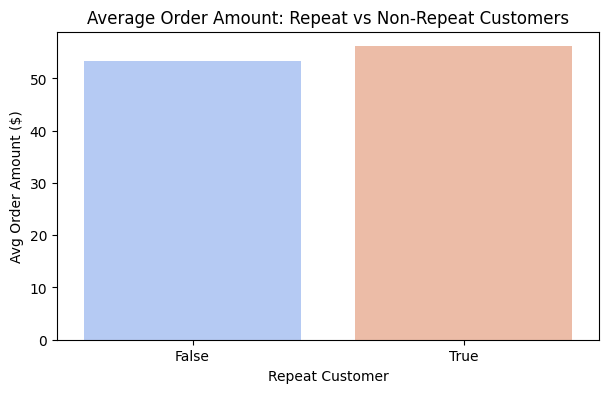

<ipython-input-55-d70aee9f103d>:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=distance_comparison.index, y=distance_comparison.values, palette='coolwarm')


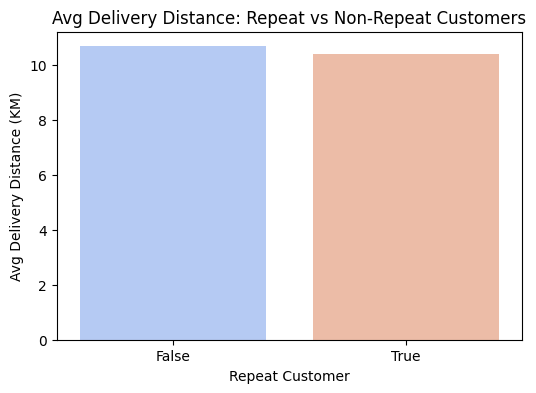

<ipython-input-55-d70aee9f103d>:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=discount_comparison.index, y=discount_comparison.values, palette='coolwarm')


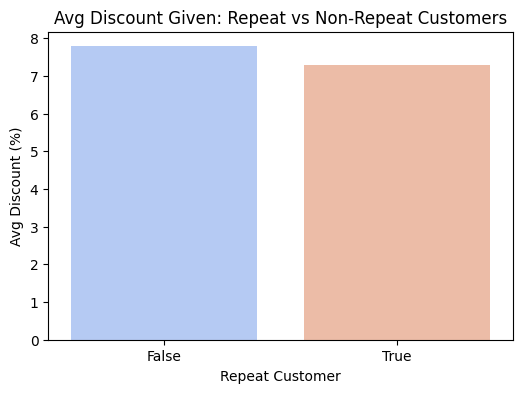

<ipython-input-55-d70aee9f103d>:44: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=delivery_time_comparison.index, y=delivery_time_comparison.values, palette='coolwarm')


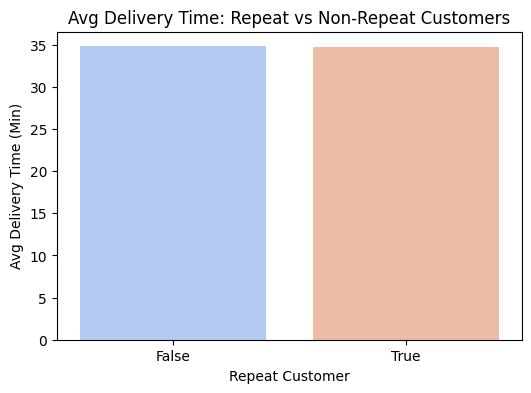

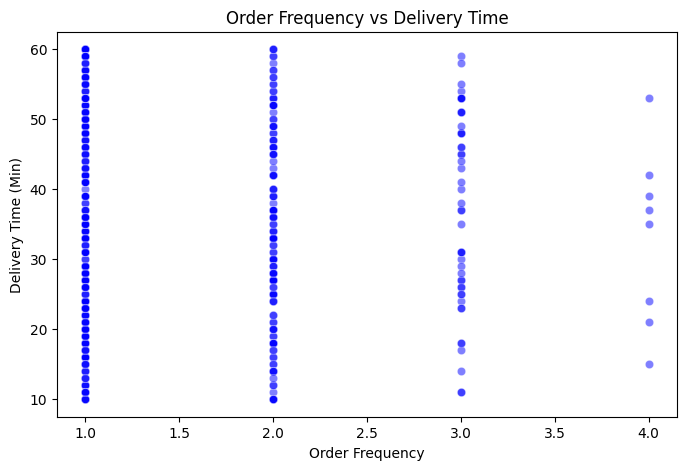

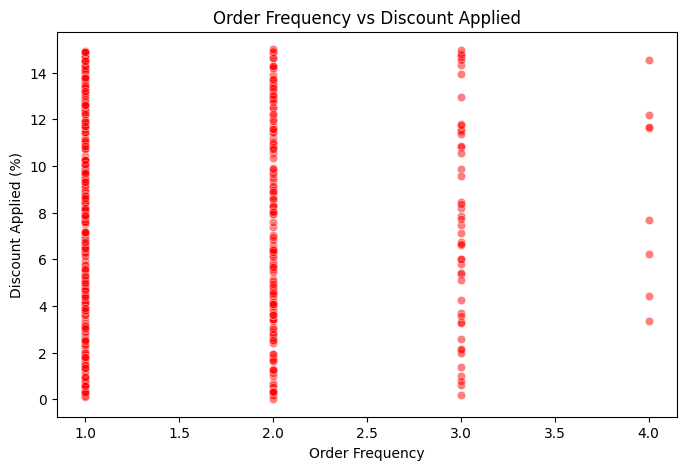


--- Customer Retention Analysis ---
Average Order Amount by Repeat Customers:
RepeatCustomer
False    53.337718
True     56.135644
Name: OrderAmount, dtype: float64

Average Delivery Distance by Repeat Customers:
RepeatCustomer
False    10.684027
True     10.400545
Name: DeliveryDistanceKM, dtype: float64

Average Discount by Repeat Customers:
RepeatCustomer
False    7.785705
True     7.294010
Name: DiscountApplied, dtype: float64

Average Delivery Time by Repeat Customers:
RepeatCustomer
False    34.785235
True     34.707921
Name: DeliveryTimeMin, dtype: float64


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset (assuming df_orders is already available)

# Step 1: Identify Repeat Customers
df_orders['RepeatCustomer'] = df_orders.duplicated(subset=['CustomerID'], keep=False)
repeat_counts = df_orders.groupby('CustomerID').size()
df_orders['OrderFrequency'] = df_orders['CustomerID'].map(repeat_counts)

# Step 2: Relationship Analysis

# 1️⃣ Order Amount vs Repeat Customers
order_amount_comparison = df_orders.groupby('RepeatCustomer')['OrderAmount'].mean()
plt.figure(figsize=(7, 4))
sns.barplot(x=order_amount_comparison.index, y=order_amount_comparison.values, palette='coolwarm')
plt.title("Average Order Amount: Repeat vs Non-Repeat Customers")
plt.ylabel("Avg Order Amount ($)")
plt.xlabel("Repeat Customer")
plt.show()

# 2️⃣ Delivery Distance vs Repeat Customers
distance_comparison = df_orders.groupby('RepeatCustomer')['DeliveryDistanceKM'].mean()
plt.figure(figsize=(6, 4))
sns.barplot(x=distance_comparison.index, y=distance_comparison.values, palette='coolwarm')
plt.title("Avg Delivery Distance: Repeat vs Non-Repeat Customers")
plt.ylabel("Avg Delivery Distance (KM)")
plt.xlabel("Repeat Customer")
plt.show()

# 3️⃣ Discount Impact on Retention
discount_comparison = df_orders.groupby('RepeatCustomer')['DiscountApplied'].mean()
plt.figure(figsize=(6, 4))
sns.barplot(x=discount_comparison.index, y=discount_comparison.values, palette='coolwarm')
plt.title("Avg Discount Given: Repeat vs Non-Repeat Customers")
plt.ylabel("Avg Discount (%)")
plt.xlabel("Repeat Customer")
plt.show()

# 4️⃣ Delivery Time vs Retention
delivery_time_comparison = df_orders.groupby('RepeatCustomer')['DeliveryTimeMin'].mean()
plt.figure(figsize=(6, 4))
sns.barplot(x=delivery_time_comparison.index, y=delivery_time_comparison.values, palette='coolwarm')
plt.title("Avg Delivery Time: Repeat vs Non-Repeat Customers")
plt.ylabel("Avg Delivery Time (Min)")
plt.xlabel("Repeat Customer")
plt.show()

# Scatter Plot: Delivery Time vs Order Frequency
plt.figure(figsize=(8, 5))
sns.scatterplot(x=df_orders['OrderFrequency'], y=df_orders['DeliveryTimeMin'], alpha=0.5, color='blue')
plt.title("Order Frequency vs Delivery Time")
plt.xlabel("Order Frequency")
plt.ylabel("Delivery Time (Min)")
plt.show()

# Scatter Plot: Discount vs Order Frequency
plt.figure(figsize=(8, 5))
sns.scatterplot(x=df_orders['OrderFrequency'], y=df_orders['DiscountApplied'], alpha=0.5, color='red')
plt.title("Order Frequency vs Discount Applied")
plt.xlabel("Order Frequency")
plt.ylabel("Discount Applied (%)")
plt.show()

# Final Summary of Results
print("\n--- Customer Retention Analysis ---")
print("Average Order Amount by Repeat Customers:")
print(order_amount_comparison)
print("\nAverage Delivery Distance by Repeat Customers:")
print(distance_comparison)
print("\nAverage Discount by Repeat Customers:")
print(discount_comparison)
print("\nAverage Delivery Time by Repeat Customers:")
print(delivery_time_comparison)


<ipython-input-58-e7d743d6cd0e>:29: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  retention_by_order_amount = df_orders[df_orders['RepeatCustomer']].groupby('OrderAmountCategory')['RepeatCustomer'].count()


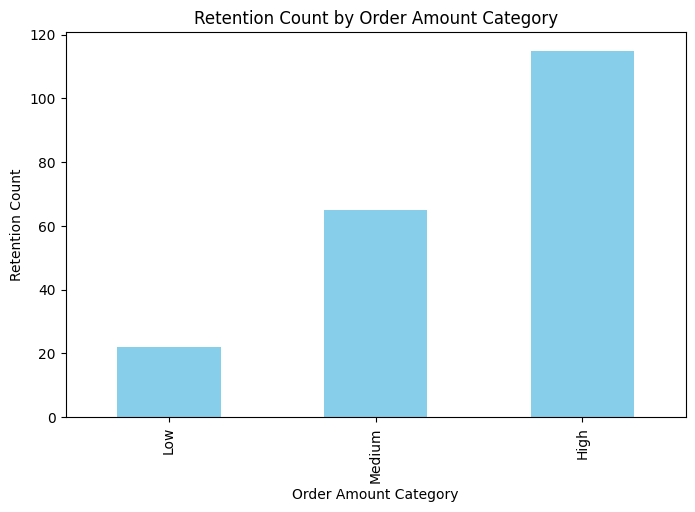

<ipython-input-58-e7d743d6cd0e>:38: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  retention_by_distance = df_orders[df_orders['RepeatCustomer']].groupby('DeliveryDistanceCategory')['RepeatCustomer'].count()


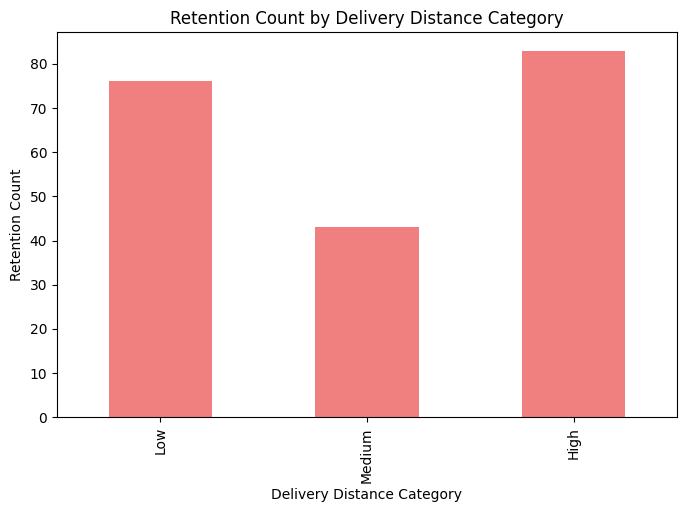

<ipython-input-58-e7d743d6cd0e>:47: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  retention_by_discount = df_orders[df_orders['RepeatCustomer']].groupby('DiscountCategory')['RepeatCustomer'].count()


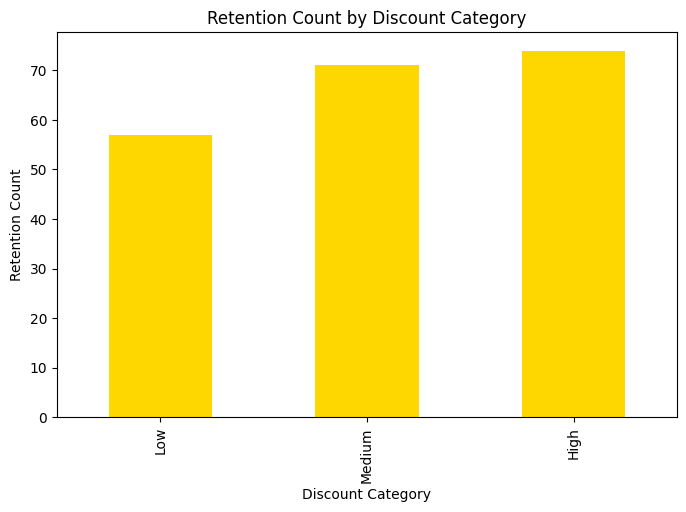

<ipython-input-58-e7d743d6cd0e>:59: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  retention_by_delivery_time = df_orders[df_orders['RepeatCustomer']].groupby('DeliveryTimeCategory')['RepeatCustomer'].count()


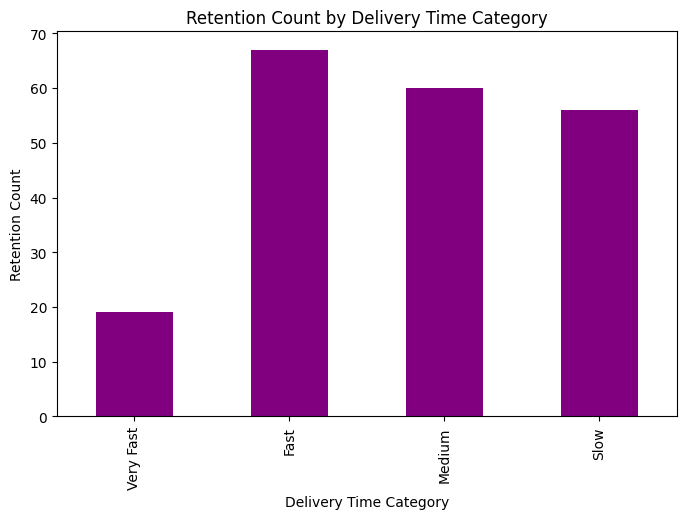


--- Customer Retention Analysis (Segmented) ---

Retention Count by Order Amount Category:
OrderAmountCategory
Low        22
Medium     65
High      115
Name: RepeatCustomer, dtype: int64

Retention Count by Delivery Distance Category:
DeliveryDistanceCategory
Low       76
Medium    43
High      83
Name: RepeatCustomer, dtype: int64

Retention Count by Discount Category:
DiscountCategory
Low       57
Medium    71
High      74
Name: RepeatCustomer, dtype: int64

Retention Count by Delivery Time Category:
DeliveryTimeCategory
Very Fast    19
Fast         67
Medium       60
Slow         56
Name: RepeatCustomer, dtype: int64


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset (assuming df_orders is already available)

# Step 1: Identify Repeat Customers
df_orders['RepeatCustomer'] = df_orders.duplicated(subset=['CustomerID'], keep=False)
repeat_counts = df_orders.groupby('CustomerID').size()
df_orders['OrderFrequency'] = df_orders['CustomerID'].map(repeat_counts)

# Step 2: Segment Data

distance_bins = [0,7.5,12.5,20]  # Adjusted distance bins
distance_labels = [ 'Low', 'Medium', 'High']
df_orders['DeliveryDistanceCategory'] = pd.cut(df_orders['DeliveryDistanceKM'], bins=distance_bins, labels=distance_labels, include_lowest=True)

order_amount_bins = [0, 20, 50, 100]
order_amount_labels = [ 'Low', 'Medium', 'High']
df_orders['OrderAmountCategory'] = pd.cut(df_orders['OrderAmount'], bins=order_amount_bins, labels=order_amount_labels, include_lowest=True)

discount_bins = [0, 4, 9, 20]
discount_labels = ['Low', 'Medium', 'High']
df_orders['DiscountCategory'] = pd.cut(df_orders['DiscountApplied'], bins=discount_bins, labels=discount_labels, include_lowest=True)

# Step 3: Customer Retention Analysis within Segments

# 1️⃣ Retention Count by Order Amount Category
retention_by_order_amount = df_orders[df_orders['RepeatCustomer']].groupby('OrderAmountCategory')['RepeatCustomer'].count()
plt.figure(figsize=(8, 5))
retention_by_order_amount.plot(kind='bar', color='skyblue')
plt.title("Retention Count by Order Amount Category")
plt.xlabel("Order Amount Category")
plt.ylabel("Retention Count")
plt.show()

# 2️⃣ Retention Count by Delivery Distance Category
retention_by_distance = df_orders[df_orders['RepeatCustomer']].groupby('DeliveryDistanceCategory')['RepeatCustomer'].count()
plt.figure(figsize=(8, 5))
retention_by_distance.plot(kind='bar', color='lightcoral')
plt.title("Retention Count by Delivery Distance Category")
plt.xlabel("Delivery Distance Category")
plt.ylabel("Retention Count")
plt.show()

# 3️⃣ Retention Count by Discount Category
retention_by_discount = df_orders[df_orders['RepeatCustomer']].groupby('DiscountCategory')['RepeatCustomer'].count()
plt.figure(figsize=(8, 5))
retention_by_discount.plot(kind='bar', color='gold')
plt.title("Retention Count by Discount Category")
plt.xlabel("Discount Category")
plt.ylabel("Retention Count")
plt.show()

# 4️⃣ Retention Count by Delivery Time Category
delivery_time_bins = [0, 15, 30, 45, 60]
delivery_time_labels = ['Very Fast', 'Fast', 'Medium', 'Slow']
df_orders['DeliveryTimeCategory'] = pd.cut(df_orders['DeliveryTimeMin'], bins=delivery_time_bins, labels=delivery_time_labels, include_lowest=True)
retention_by_delivery_time = df_orders[df_orders['RepeatCustomer']].groupby('DeliveryTimeCategory')['RepeatCustomer'].count()
plt.figure(figsize=(8, 5))
retention_by_delivery_time.plot(kind='bar', color='purple')
plt.title("Retention Count by Delivery Time Category")
plt.xlabel("Delivery Time Category")
plt.ylabel("Retention Count")
plt.show()

# Final Summary of Results (Segmented)
print("\n--- Customer Retention Analysis (Segmented) ---")
print("\nRetention Count by Order Amount Category:")
print(retention_by_order_amount)

print("\nRetention Count by Delivery Distance Category:")
print(retention_by_distance)

print("\nRetention Count by Discount Category:")
print(retention_by_discount)

print("\nRetention Count by Delivery Time Category:")
print(retention_by_delivery_time)


<ipython-input-59-82dff6735482>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=order_amount_comparison.index, y=order_amount_comparison.values, palette='coolwarm')


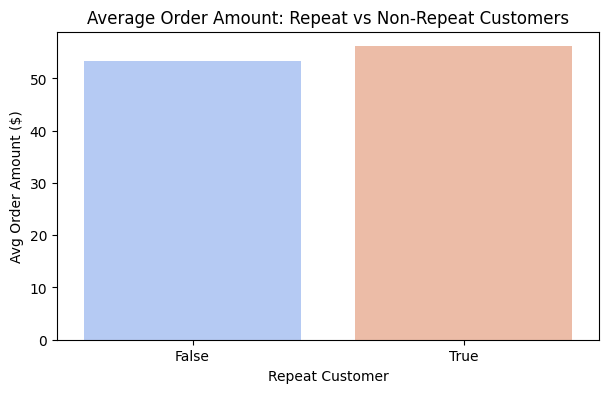

<ipython-input-59-82dff6735482>:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=distance_comparison.index, y=distance_comparison.values, palette='coolwarm')


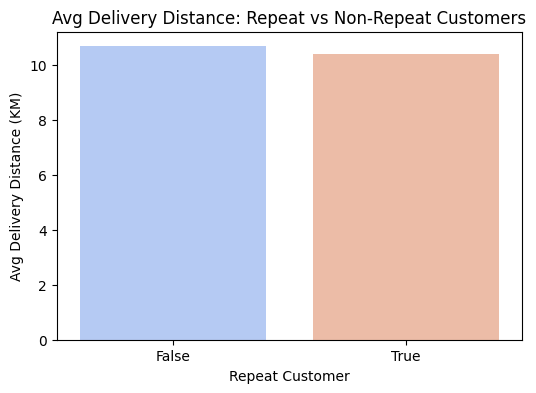

<ipython-input-59-82dff6735482>:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=discount_comparison.index, y=discount_comparison.values, palette='coolwarm')


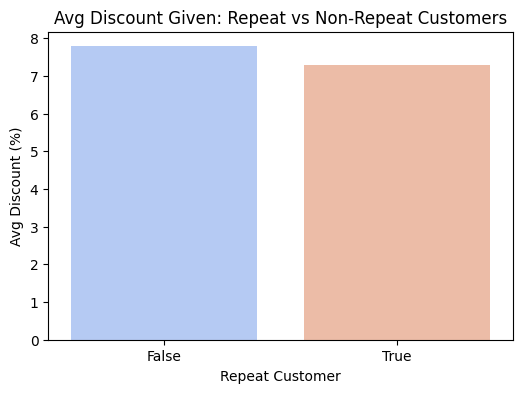

<ipython-input-59-82dff6735482>:43: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=delivery_time_comparison.index, y=delivery_time_comparison.values, palette='coolwarm')


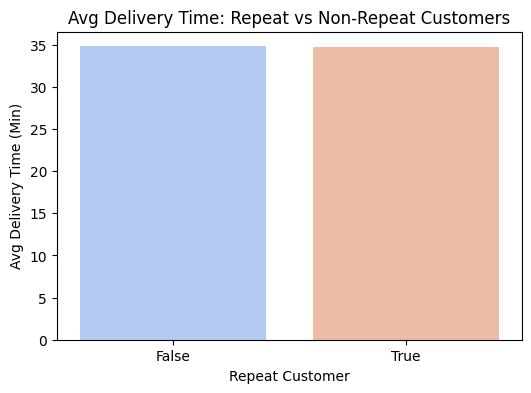

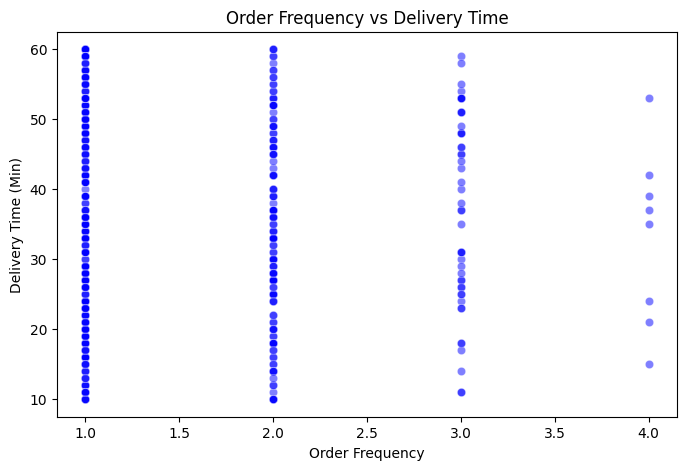

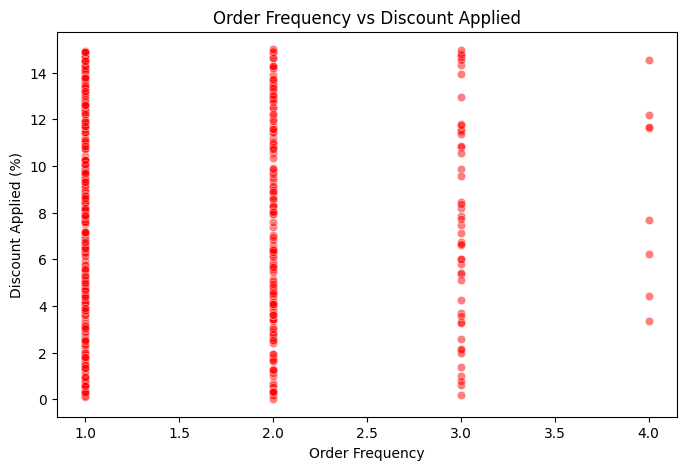


--- Customer Retention Analysis ---
Average Order Amount by Repeat Customers:
RepeatCustomer
False    53.337718
True     56.135644
Name: OrderAmount, dtype: float64

Average Delivery Distance by Repeat Customers:
RepeatCustomer
False    10.684027
True     10.400545
Name: DeliveryDistanceKM, dtype: float64

Average Discount by Repeat Customers:
RepeatCustomer
False    7.785705
True     7.294010
Name: DiscountApplied, dtype: float64

Average Delivery Time by Repeat Customers:
RepeatCustomer
False    34.785235
True     34.707921
Name: DeliveryTimeMin, dtype: float64


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset (assuming df_orders is already available)

# Step 1: Identify Repeat Customers
df_orders['OrderFrequency'] = df_orders['CustomerID'].map(df_orders['CustomerID'].value_counts())
df_orders['RepeatCustomer'] = df_orders['OrderFrequency'] > 1  # True if customer has more than 1 order

# Step 2: Relationship Analysis

# 1️⃣ Order Amount vs Repeat Customers
order_amount_comparison = df_orders.groupby('RepeatCustomer')['OrderAmount'].mean()
plt.figure(figsize=(7, 4))
sns.barplot(x=order_amount_comparison.index, y=order_amount_comparison.values, palette='coolwarm')
plt.title("Average Order Amount: Repeat vs Non-Repeat Customers")
plt.ylabel("Avg Order Amount ($)")
plt.xlabel("Repeat Customer")
plt.show()

# 2️⃣ Delivery Distance vs Repeat Customers
distance_comparison = df_orders.groupby('RepeatCustomer')['DeliveryDistanceKM'].mean()
plt.figure(figsize=(6, 4))
sns.barplot(x=distance_comparison.index, y=distance_comparison.values, palette='coolwarm')
plt.title("Avg Delivery Distance: Repeat vs Non-Repeat Customers")
plt.ylabel("Avg Delivery Distance (KM)")
plt.xlabel("Repeat Customer")
plt.show()

# 3️⃣ Discount Impact on Retention
discount_comparison = df_orders.groupby('RepeatCustomer')['DiscountApplied'].mean()
plt.figure(figsize=(6, 4))
sns.barplot(x=discount_comparison.index, y=discount_comparison.values, palette='coolwarm')
plt.title("Avg Discount Given: Repeat vs Non-Repeat Customers")
plt.ylabel("Avg Discount (%)")
plt.xlabel("Repeat Customer")
plt.show()

# 4️⃣ Delivery Time vs Retention
delivery_time_comparison = df_orders.groupby('RepeatCustomer')['DeliveryTimeMin'].mean()
plt.figure(figsize=(6, 4))
sns.barplot(x=delivery_time_comparison.index, y=delivery_time_comparison.values, palette='coolwarm')
plt.title("Avg Delivery Time: Repeat vs Non-Repeat Customers")
plt.ylabel("Avg Delivery Time (Min)")
plt.xlabel("Repeat Customer")
plt.show()

# Scatter Plot: Delivery Time vs Order Frequency
plt.figure(figsize=(8, 5))
sns.scatterplot(x=df_orders['OrderFrequency'], y=df_orders['DeliveryTimeMin'], alpha=0.5, color='blue')
plt.title("Order Frequency vs Delivery Time")
plt.xlabel("Order Frequency")
plt.ylabel("Delivery Time (Min)")
plt.show()

# Scatter Plot: Discount vs Order Frequency
plt.figure(figsize=(8, 5))
sns.scatterplot(x=df_orders['OrderFrequency'], y=df_orders['DiscountApplied'], alpha=0.5, color='red')
plt.title("Order Frequency vs Discount Applied")
plt.xlabel("Order Frequency")
plt.ylabel("Discount Applied (%)")
plt.show()

# Final Summary of Results
print("\n--- Customer Retention Analysis ---")
print("Average Order Amount by Repeat Customers:")
print(order_amount_comparison)
print("\nAverage Delivery Distance by Repeat Customers:")
print(distance_comparison)
print("\nAverage Discount by Repeat Customers:")
print(discount_comparison)
print("\nAverage Delivery Time by Repeat Customers:")
print(delivery_time_comparison)


<ipython-input-61-7775c9373004>:27: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  retention = data.groupby(category)['RepeatCustomer'].sum()  # Using sum() instead of count() for binary values
<ipython-input-61-7775c9373004>:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=retention.index, y=retention.values, palette=color)


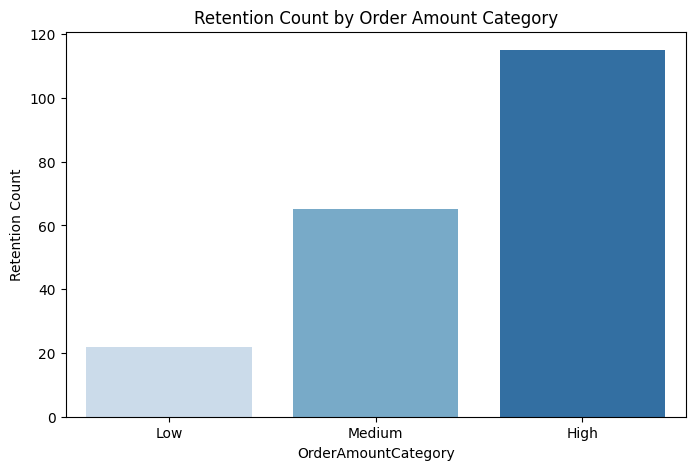

<ipython-input-61-7775c9373004>:27: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  retention = data.groupby(category)['RepeatCustomer'].sum()  # Using sum() instead of count() for binary values
<ipython-input-61-7775c9373004>:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=retention.index, y=retention.values, palette=color)


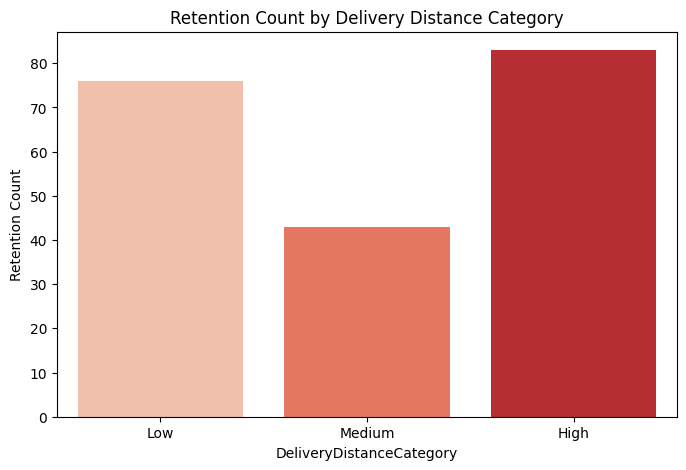

<ipython-input-61-7775c9373004>:27: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  retention = data.groupby(category)['RepeatCustomer'].sum()  # Using sum() instead of count() for binary values
<ipython-input-61-7775c9373004>:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=retention.index, y=retention.values, palette=color)


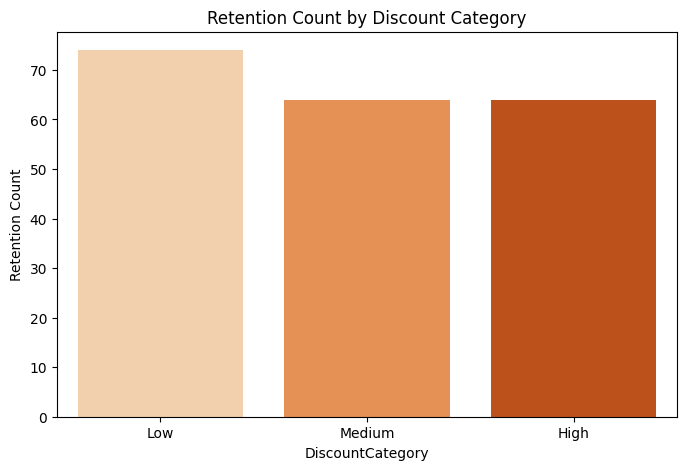

<ipython-input-61-7775c9373004>:27: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  retention = data.groupby(category)['RepeatCustomer'].sum()  # Using sum() instead of count() for binary values
<ipython-input-61-7775c9373004>:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=retention.index, y=retention.values, palette=color)


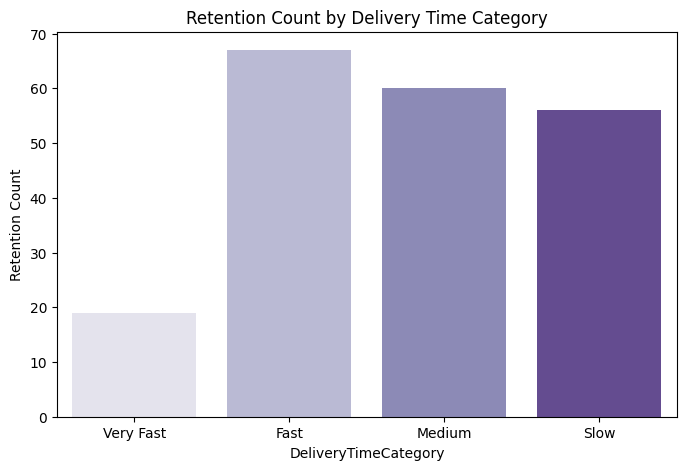


--- Customer Retention Analysis (Segmented) ---

Retention Count by Order Amount Category:
OrderAmountCategory
Low        22
Medium     65
High      115
Name: RepeatCustomer, dtype: int64

Retention Count by Delivery Distance Category:
DeliveryDistanceCategory
Low       76
Medium    43
High      83
Name: RepeatCustomer, dtype: int64

Retention Count by Discount Category:
DiscountCategory
Low       74
Medium    64
High      64
Name: RepeatCustomer, dtype: int64

Retention Count by Delivery Time Category:
DeliveryTimeCategory
Very Fast    19
Fast         67
Medium       60
Slow         56
Name: RepeatCustomer, dtype: int64


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset (assuming df_orders is already available)

# Step 1: Identify Repeat Customers
df_orders['OrderFrequency'] = df_orders['CustomerID'].map(df_orders['CustomerID'].value_counts())
df_orders['RepeatCustomer'] = df_orders['OrderFrequency'] > 1  # True if customer has more than 1 order

# Step 2: Segment Data
distance_bins = [0, 7.5, 12.5, 20]  # Adjusted distance bins
distance_labels = ['Low', 'Medium', 'High']
df_orders['DeliveryDistanceCategory'] = pd.cut(df_orders['DeliveryDistanceKM'], bins=distance_bins, labels=distance_labels, include_lowest=True)

order_amount_bins = [0, 20, 50, 100]
order_amount_labels = ['Low', 'Medium', 'High']
df_orders['OrderAmountCategory'] = pd.cut(df_orders['OrderAmount'], bins=order_amount_bins, labels=order_amount_labels, include_lowest=True)

discount_bins = [0, 5,10, 15]
discount_labels = ['Low', 'Medium', 'High']
df_orders['DiscountCategory'] = pd.cut(df_orders['DiscountApplied'], bins=discount_bins, labels=discount_labels, include_lowest=True)

# Step 3: Customer Retention Analysis within Segments

def plot_retention(data, category, color, title):
    retention = data.groupby(category)['RepeatCustomer'].sum()  # Using sum() instead of count() for binary values
    plt.figure(figsize=(8, 5))
    sns.barplot(x=retention.index, y=retention.values, palette=color)
    plt.title(title)
    plt.xlabel(category)
    plt.ylabel("Retention Count")
    plt.show()
    return retention

# 1️⃣ Retention Count by Order Amount Category
retention_by_order_amount = plot_retention(df_orders, 'OrderAmountCategory', 'Blues', "Retention Count by Order Amount Category")

# 2️⃣ Retention Count by Delivery Distance Category
retention_by_distance = plot_retention(df_orders, 'DeliveryDistanceCategory', 'Reds', "Retention Count by Delivery Distance Category")

# 3️⃣ Retention Count by Discount Category
retention_by_discount = plot_retention(df_orders, 'DiscountCategory', 'Oranges', "Retention Count by Discount Category")

# 4️⃣ Retention Count by Delivery Time Category
delivery_time_bins = [0, 15, 30, 45, 60]
delivery_time_labels = ['Very Fast', 'Fast', 'Medium', 'Slow']
df_orders['DeliveryTimeCategory'] = pd.cut(df_orders['DeliveryTimeMin'], bins=delivery_time_bins, labels=delivery_time_labels, include_lowest=True)

retention_by_delivery_time = plot_retention(df_orders, 'DeliveryTimeCategory', 'Purples', "Retention Count by Delivery Time Category")

# Final Summary of Results (Segmented)
print("\n--- Customer Retention Analysis (Segmented) ---")
print("\nRetention Count by Order Amount Category:")
print(retention_by_order_amount)

print("\nRetention Count by Delivery Distance Category:")
print(retention_by_distance)

print("\nRetention Count by Discount Category:")
print(retention_by_discount)

print("\nRetention Count by Delivery Time Category:")
print(retention_by_delivery_time)


In [ ]:
import pandas as pd

# Load the dataset
file_path = "food_delivery_data_with_food_type.csv"
df = pd.read_csv(file_path)

# Convert OrderDate to datetime format
df["OrderDate"] = pd.to_datetime(df["OrderDate"], format="%d-%m-%Y")

# 1) Count the number of orders per food type
food_counts = df["FoodType"].value_counts()
print("Food Type Order Counts:")
print(food_counts)

# 2) Identify repeat customers and analyze repeat food orders
customer_order_counts = df.groupby("CustomerID")["OrderID"].count()
repeat_customers = customer_order_counts[customer_order_counts > 1].index
df_repeat_customers = df[df["CustomerID"].isin(repeat_customers)]

# Count the occurrences of each food type among repeat customers
food_reorder_counts = df_repeat_customers["FoodType"].value_counts()
print("\nFood Types Ordered by Repeat Customers:")
print(food_reorder_counts)


Food Type Order Counts:
FoodType
Dessert     67
Seafood     58
Pasta       57
Sandwich    52
Sushi       51
Tacos       51
Pizza       51
Salad       42
Steak       40
Burger      31
Name: count, dtype: int64

Food Types Ordered by Repeat Customers:
FoodType
Seafood     26
Dessert     24
Pizza       23
Sushi       22
Sandwich    21
Pasta       20
Tacos       19
Steak       17
Salad       16
Burger      13
Name: count, dtype: int64


Food Type Order Counts:
FoodType
Dessert     67
Seafood     58
Pasta       57
Sandwich    52
Sushi       51
Tacos       51
Pizza       51
Salad       42
Steak       40
Burger      31
Name: count, dtype: int64


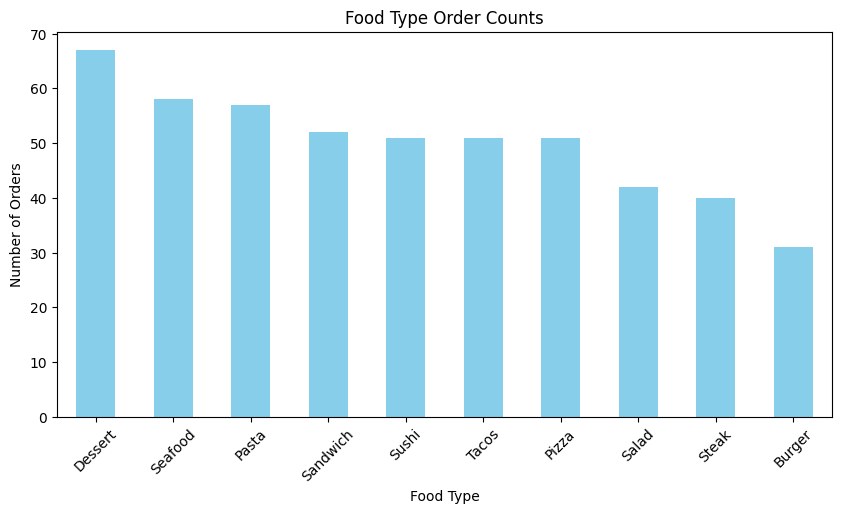


Food Types Ordered by Repeat Customers:
FoodType
Seafood     26
Dessert     24
Pizza       23
Sushi       22
Sandwich    21
Pasta       20
Tacos       19
Steak       17
Salad       16
Burger      13
Name: count, dtype: int64


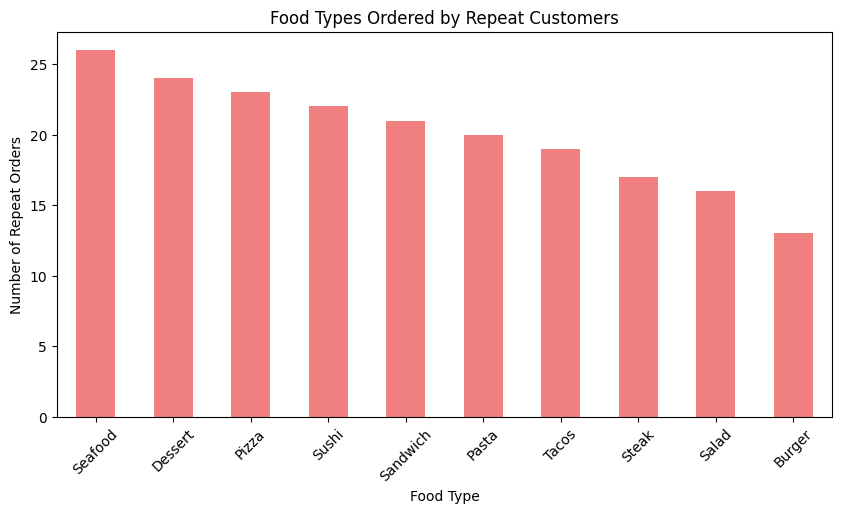

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
file_path = "food_delivery_data_with_food_type.csv"
df = pd.read_csv(file_path)

# Convert OrderDate to datetime format
df["OrderDate"] = pd.to_datetime(df["OrderDate"], format="%d-%m-%Y")

# 1) Count the number of orders per food type
food_counts = df["FoodType"].value_counts()
print("Food Type Order Counts:")
print(food_counts)

# Plot food type order counts
plt.figure(figsize=(10,5))
food_counts.plot(kind='bar', color='skyblue')
plt.title("Food Type Order Counts")
plt.xlabel("Food Type")
plt.ylabel("Number of Orders")
plt.xticks(rotation=45)
plt.show()

# 2) Identify repeat customers and analyze repeat food orders
customer_order_counts = df.groupby("CustomerID")["OrderID"].count()
repeat_customers = customer_order_counts[customer_order_counts > 1].index
df_repeat_customers = df[df["CustomerID"].isin(repeat_customers)]

# Count the occurrences of each food type among repeat customers
food_reorder_counts = df_repeat_customers["FoodType"].value_counts()
print("\nFood Types Ordered by Repeat Customers:")
print(food_reorder_counts)

# Plot food types ordered by repeat customers
plt.figure(figsize=(10,5))
food_reorder_counts.plot(kind='bar', color='lightcoral')
plt.title("Food Types Ordered by Repeat Customers")
plt.xlabel("Food Type")
plt.ylabel("Number of Repeat Orders")
plt.xticks(rotation=45)
plt.show()


Food Type Order Counts:
FoodType
Dessert     67
Seafood     58
Pasta       57
Sandwich    52
Sushi       51
Tacos       51
Pizza       51
Salad       42
Steak       40
Burger      31
Name: count, dtype: int64


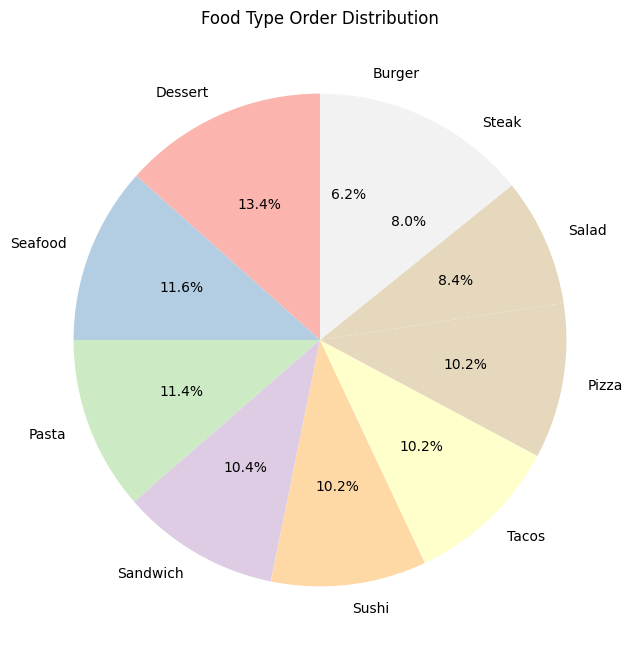


Food Types Ordered by Repeat Customers:
FoodType
Seafood     26
Dessert     24
Pizza       23
Sushi       22
Sandwich    21
Pasta       20
Tacos       19
Steak       17
Salad       16
Burger      13
Name: count, dtype: int64


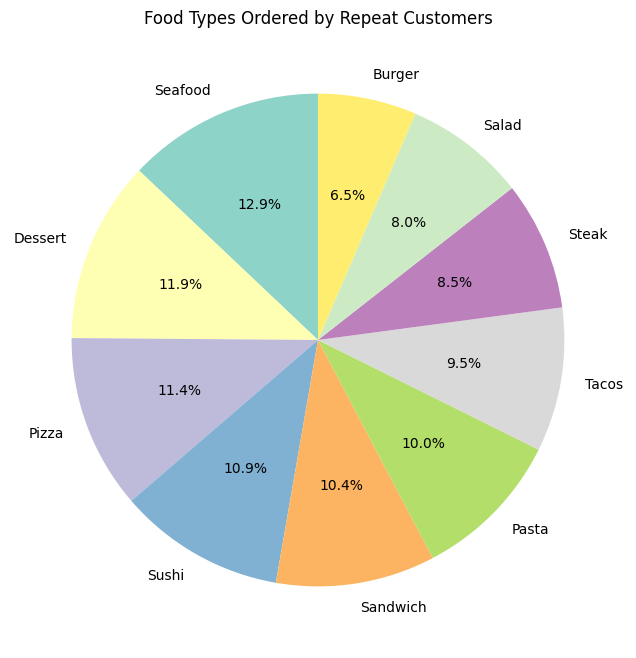

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
file_path = "food_delivery_data_with_food_type.csv"
df = pd.read_csv(file_path)

# Convert OrderDate to datetime format
df["OrderDate"] = pd.to_datetime(df["OrderDate"], format="%d-%m-%Y")

# 1) Count the number of orders per food type
food_counts = df["FoodType"].value_counts()
print("Food Type Order Counts:")
print(food_counts)

# Plot food type order counts as pie chart
plt.figure(figsize=(8,8))
food_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90, cmap='Pastel1')
plt.title("Food Type Order Distribution")
plt.ylabel("")
plt.show()

# 2) Identify repeat customers and analyze repeat food orders
customer_order_counts = df.groupby("CustomerID")["OrderID"].count()
repeat_customers = customer_order_counts[customer_order_counts > 1].index
df_repeat_customers = df[df["CustomerID"].isin(repeat_customers)]

# Count the occurrences of each food type among repeat customers
food_reorder_counts = df_repeat_customers["FoodType"].value_counts()
print("\nFood Types Ordered by Repeat Customers:")
print(food_reorder_counts)

# Plot food types ordered by repeat customers as pie chart
plt.figure(figsize=(8,8))
food_reorder_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90, cmap='Set3')
plt.title("Food Types Ordered by Repeat Customers")
plt.ylabel("")
plt.show()

Food Type Order Counts:
FoodType
Dessert     67
Seafood     58
Pasta       57
Sandwich    52
Sushi       51
Tacos       51
Pizza       51
Salad       42
Steak       40
Burger      31
Name: count, dtype: int64


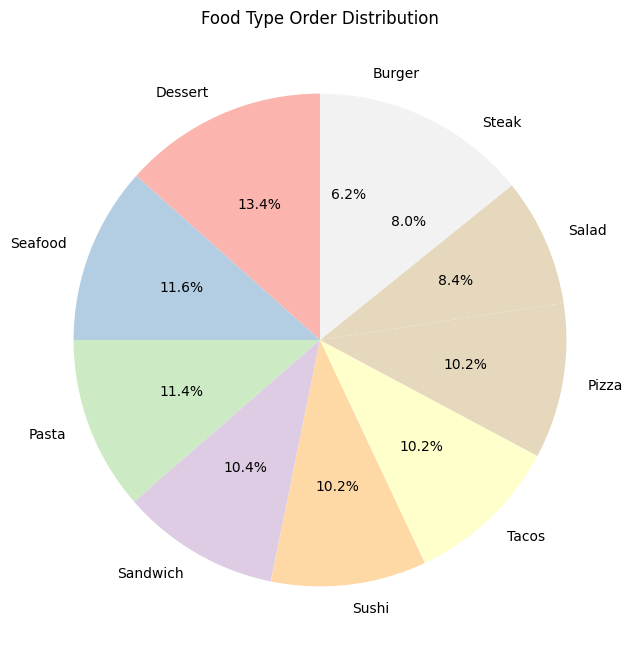


Food Types Ordered by Repeat Customers:
FoodType
Seafood     26
Dessert     24
Pizza       23
Sushi       22
Sandwich    21
Pasta       20
Tacos       19
Steak       17
Salad       16
Burger      13
Name: count, dtype: int64


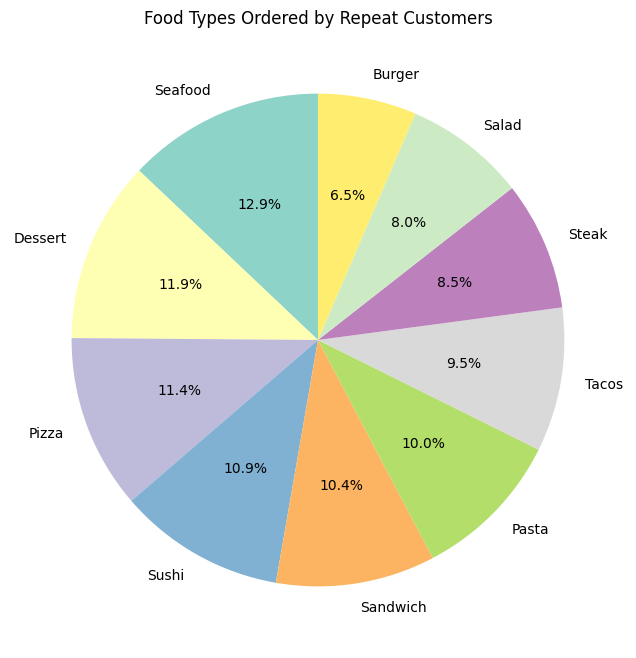


Orders Per Day of the Week:
DayOfWeek
Monday       85
Tuesday      84
Friday       80
Saturday     74
Thursday     65
Wednesday    60
Sunday       52
Name: count, dtype: int64


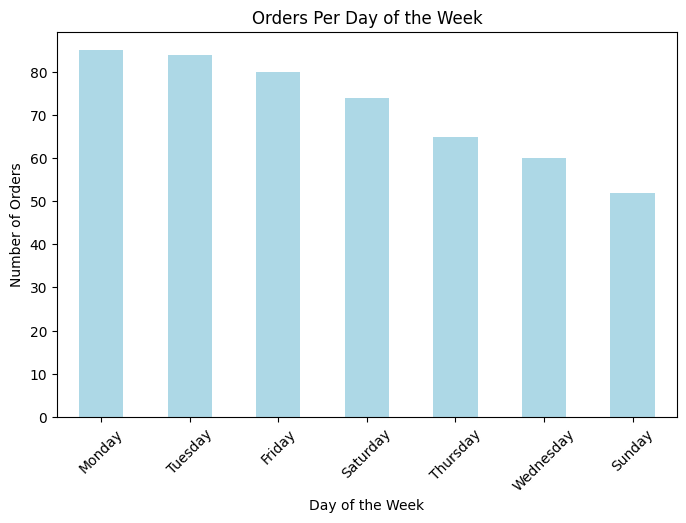

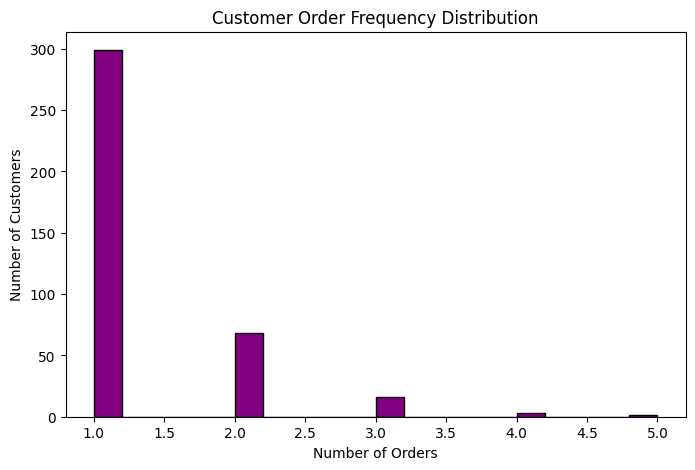


Monthly Food Trends:
FoodType  Burger  Dessert  Pasta  Pizza  Salad  Sandwich  Seafood  Steak  \
Month                                                                      
2024-10        9       17     11     13     11        14       11      7   
2024-11        5       20     21     20     12        16       19     19   
2024-12       13       19     23     15     17        17       22     12   
2025-01        4       11      2      3      2         5        6      2   

FoodType  Sushi  Tacos  
Month                   
2024-10      13     17  
2024-11      13     21  
2024-12      23     12  
2025-01       2      1  


<Figure size 1200x600 with 0 Axes>

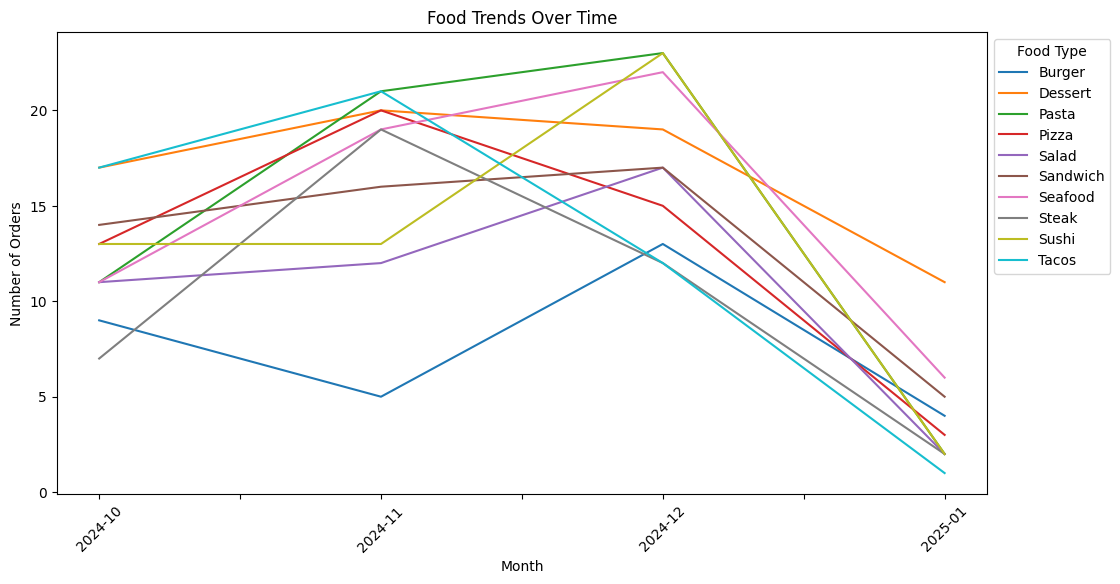

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
file_path = "food_delivery_data_with_food_type.csv"
df = pd.read_csv(file_path)

# Convert OrderDate to datetime format
df["OrderDate"] = pd.to_datetime(df["OrderDate"], format="%d-%m-%Y")

# 1) Count the number of orders per food type
food_counts = df["FoodType"].value_counts()
print("Food Type Order Counts:")
print(food_counts)

# Plot food type order counts as pie chart
plt.figure(figsize=(8,8))
food_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90, cmap='Pastel1')
plt.title("Food Type Order Distribution")
plt.ylabel("")
plt.show()

# 2) Identify repeat customers and analyze repeat food orders
customer_order_counts = df.groupby("CustomerID")["OrderID"].count()
repeat_customers = customer_order_counts[customer_order_counts > 1].index
df_repeat_customers = df[df["CustomerID"].isin(repeat_customers)]

# Count the occurrences of each food type among repeat customers
food_reorder_counts = df_repeat_customers["FoodType"].value_counts()
print("\nFood Types Ordered by Repeat Customers:")
print(food_reorder_counts)

# Plot food types ordered by repeat customers as pie chart
plt.figure(figsize=(8,8))
food_reorder_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90, cmap='Set3')
plt.title("Food Types Ordered by Repeat Customers")
plt.ylabel("")
plt.show()

# 3) Peak Ordering Days
df["DayOfWeek"] = df["OrderDate"].dt.day_name()
day_order_counts = df["DayOfWeek"].value_counts()
print("\nOrders Per Day of the Week:")
print(day_order_counts)

plt.figure(figsize=(8,5))
day_order_counts.plot(kind='bar', color='lightblue')
plt.title("Orders Per Day of the Week")
plt.xlabel("Day of the Week")
plt.ylabel("Number of Orders")
plt.xticks(rotation=45)
plt.show()

# 4) Customer Loyalty Analysis
plt.figure(figsize=(8,5))
customer_order_counts.plot(kind='hist', bins=20, color='purple', edgecolor='black')
plt.title("Customer Order Frequency Distribution")
plt.xlabel("Number of Orders")
plt.ylabel("Number of Customers")
plt.show()

# 5) Most Popular Food Trends Over Time
df["Month"] = df["OrderDate"].dt.strftime('%Y-%m')
monthly_food_trends = df.groupby(["Month", "FoodType"]).size().unstack().fillna(0)
print("\nMonthly Food Trends:")
print(monthly_food_trends)

plt.figure(figsize=(12,6))
monthly_food_trends.plot(kind='line', figsize=(12,6))
plt.title("Food Trends Over Time")
plt.xlabel("Month")
plt.ylabel("Number of Orders")
plt.xticks(rotation=45)
plt.legend(title="Food Type", bbox_to_anchor=(1,1))
plt.show()
